In [23]:
#TODO: 
# go through each JSON, 
   # go through each column "labels"
     # each label is saved as prompt
     # each document is saved with .png as an image
        # go through each value of label and unify the bounding boxes, (xmin,ymin,xmax,ymax)
        # join the text on ' ' and save as text column
        

### Embedding with image name

In [11]:
import json
import os
import glob

# Directory paths
json_directory = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label'
output_dataset = []

# Iterate over each JSON file in the directory
for json_file in glob.glob(os.path.join(json_directory, '*.json')):
    # Load the JSON data
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    # For each label, join text and unify bounding boxes
    for label in data.get("labels", []):
        prompt = label.get("label")
        text_pieces = []
        x_coords = []
        y_coords = []
        
        # Process each value within the label
        for value in label.get("value", []):
            # Collect all text pieces
            text_pieces.append(value.get("text", ""))
            
            # Collect all bounding box coordinates
            for bbox in value.get("boundingBoxes", []):
                x_coords.extend(bbox[0::2])
                y_coords.extend(bbox[1::2])
        
        # Combine text pieces and unify bounding boxes
        if text_pieces:
            unified_text = ' '.join(text_pieces)
            unified_bbox = {
                "xmax": max(x_coords),
                "xmin": min(x_coords),
                "ymax": max(y_coords),
                "ymin": min(y_coords)              
                
            }
            
            # Construct the document name and path
            document_name = os.path.splitext(data.get("document", ""))[0] + ".png"
            encoded_document_name = document_name.encode('utf-8').decode('utf-8')
            image_path = os.path.join(json_directory, encoded_document_name)
            
            # Add the information to the output dataset if the image exists
            if os.path.exists(image_path):
                output_dataset.append({
                    "file_name": encoded_document_name,
                    "image_id": encoded_document_name,
                    "prompt": prompt,
                    "text": unified_text,
                    "target_bounding_box": unified_bbox
                })

# Convert the dataset to JSON Lines format
output_jsonl = '\n'.join(json.dumps(record) for record in output_dataset)

# Write to a file named 'output_dataset.jsonl'
output_file = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label\metadata.jsonl'
with open(output_file, 'w') as f:
    f.write(output_jsonl)


### Test of dim:

Image_id: 
000-0000-00000-99-SP-005-00005-00_Leiter- und Phasenführungsplan RHGRA.png


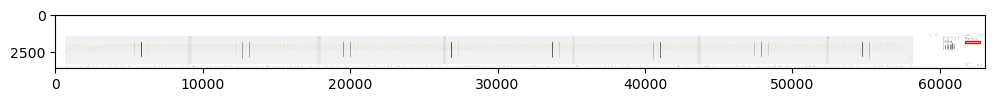

In [14]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Adjusted function for demonstration
def process_and_display_jsonl(jsonl_data, image_folder_path):
    # Assuming jsonl_data is a list of JSON strings
    for line in jsonl_data:
        record = json.loads(line)
        bboxes = [record["target_bounding_box"]]
        image_id = record["file_name"]
        print("Image_id: ")
        print(image_id)
        
        # Construct the full path to the image file
        image_path = os.path.join(image_folder_path, image_id)
        # Display the image with bounding boxes
        display_image_with_bboxes(image_path, bboxes)

# Function to display image with bounding boxes remains the same
def display_image_with_bboxes(image_path, bboxes, figsize=(12, 12)):
    # Load the image
    img = Image.open(image_path)

    # Create a plt figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)

    # Image dimensions
    width, height = img.size

    # Add bounding boxes
    for bbox in bboxes:
        # Calculate absolute positions
        abs_pos = (
            bbox['xmin'] * width,
            bbox['ymin'] * height,
            (bbox['xmax'] - bbox['xmin']) * width,
            (bbox['ymax'] - bbox['ymin']) * height
        )
        rect = patches.Rectangle(
            (abs_pos[0], abs_pos[1]), abs_pos[2], abs_pos[3],
            linewidth=1, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

    plt.show()

# Example JSON data and image path
jsonl_data = [json.dumps({"file_name": "000-0000-00000-99-SP-005-00005-00_Leiter- und Phasenf\u00fchrungsplan RHGRA.png", "prompt": "Dokumenttyp", "text": "", "target_bounding_box": {"xmax": 0.9946226103838688, "xmin": 0.9780729901139079, "ymax": 0.5251687858354799, "ymin": 0.4852046018308256}})]
image_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_test_resized'

# Call the function with the corrected path
process_and_display_jsonl(jsonl_data, image_path)


### Embedding with base64 encoded image:

In [26]:
import json
import os
import glob
import base64
import tqdm
from PIL import Image
from io import BytesIO

Image.MAX_IMAGE_PIXELS = None

# Function to encode an image to base64
def encode_image_to_base64(image_path):
    with Image.open(image_path) as image:
        buffered = BytesIO()
        image.save(buffered, format="PNG")
        return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Directory paths
json_directory = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_test'
output_dataset = []

# Iterate over each JSON file in the directory
for json_file in tqdm(glob.glob(os.path.join(json_directory, '*.json'))):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    for label in data.get("labels", []):
        prompt = label.get("label")
        text_pieces = []
        x_coords = []
        y_coords = []
        
        for value in label.get("value", []):
            text_pieces.append(value.get("text", ""))
            for bbox in value.get("boundingBoxes", []):
                x_coords.extend(bbox[0::2])
                y_coords.extend(bbox[1::2])
        
        if text_pieces:
            unified_text = ' '.join(text_pieces)
            unified_bbox = {
                "xmax": max(x_coords),
                "xmin": min(x_coords),
                "ymax": max(y_coords),
                "ymin": min(y_coords)
            }
            
            document_name = os.path.splitext(data.get("document", ""))[0] + ".png"
            image_path = os.path.join(json_directory, document_name)
            
            if os.path.exists(image_path):
                image_base64 = encode_image_to_base64(image_path)
                output_dataset.append({
                    "image_id": document_name,
                    "prompt": prompt,
                    "text": unified_text,
                    "target_bounding_box": unified_bbox,
                    "image": image_base64  # Add the encoded image
                })

# Convert the dataset to JSON Lines format and write to file
output_jsonl = '\n'.join(json.dumps(record) for record in output_dataset)
output_file = os.path.join(json_directory, 'fichtner_dataset_v2.jsonl')
with open(output_file, 'w') as f:
    f.write(output_jsonl)


### Embedding as huggingface imagefolder

In [1]:
from datasets import load_dataset

In [6]:
folder_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1_ground_truth'
dataset = load_dataset("imagefolder", data_dir=folder_path, split="train")

Resolving data files:   0%|          | 0/1244 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [11]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=827x1170>,
 'image_id': '000-0000-00000-00-QM-282-00010-01_TR-NSA-0050 Errichtung&nbsp; von Baustellenzäunen.png',
 'prompt': 'Ersteller',
 'text': 'TRANSNET BW',
 'target_bounding_box': {'xmax': 0.33681433705635355,
  'xmin': 0.13067679909001806,
  'ymax': 0.11892368542711847,
  'ymin': 0.09895895758779515},
 'ground_truth': {'gt_parses': [{'question': 'Ersteller',
    'answer': 'TRANSNET BW'}]}}

In [12]:
from datasets import DatasetDict

train_test = dataset.train_test_split(test_size=0.05)

train_test_valid_dataset = DatasetDict({
    'train': train_test['train'],
    'test': train_test['test']})

train_test

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 1179
    })
    test: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 63
    })
})

In [13]:
from huggingface_hub import notebook_login

notebook_login()

In [15]:
train_test.push_to_hub("Resi/dofi_v3_large", private=True)

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/295 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/295 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/295 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/294 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Resi/dofi_v3_large/commit/6abaf9dd6b47dd8e38d7d2b4bda9aa0ac6681e16', commit_message='Upload dataset', commit_description='', oid='6abaf9dd6b47dd8e38d7d2b4bda9aa0ac6681e16', pr_url=None, pr_revision=None, pr_num=None)

# Downscaling the image with the corresponding bounding boxes

In [5]:
#!pip install imageio
#!pip install imgaug

In [16]:
import json
import os
import imageio
import imgaug as ia
from PIL import Image
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from tqdm import tqdm

Image.MAX_IMAGE_PIXELS = None

# Path to the directory containing your images
image_dir = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_resized'
# Load the metadata
metadata_file_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_resized/metadata.jsonl'
# Directory to save the resized images
resized_image_dir = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_resized_2'

if not os.path.exists(resized_image_dir):
    os.makedirs(resized_image_dir)

# Augmenter that resizes the images to 50% of their size
augmenter = iaa.Resize(0.5)

with open(metadata_file_path, 'r') as file:
    for line in tqdm(file, desc="Processing images"): 
        metadata = json.loads(line)
        image_path = os.path.join(image_dir, metadata['file_name'])
        # Load the image
        image = imageio.imread(image_path)
        height, width = image.shape[:2]
        
        # Convert normalized bounding box coordinates to absolute coordinates
        bbox = metadata['target_bounding_box']
        xmin = int(bbox['xmin'] * width)
        xmax = int(bbox['xmax'] * width)
        ymin = int(bbox['ymin'] * height)
        ymax = int(bbox['ymax'] * height)
        bbs = BoundingBoxesOnImage([BoundingBox(x1=xmin, y1=ymin, x2=xmax, y2=ymax)], shape=image.shape)
        
        # Apply augmentation
        image_aug, bbs_aug = augmenter(image=image, bounding_boxes=bbs)
        
        # Save the resized image
        resized_image_path = os.path.join(resized_image_dir, metadata['file_name'])
        imageio.imwrite(resized_image_path, image_aug)
        
        # Optionally: Update metadata with new bounding box coordinates (normalized)
        # Here you'd recalculate the normalized coordinates based on the resized image and update your metadata accordingly

print("Image resizing and bounding box adjustments are complete.")


Processing images: 0it [00:00, ?it/s]C:\Users\lukask\AppData\Local\Temp\ipykernel_11916\2810945583.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
Processing images: 1337it [1:03:18,  2.84s/it]

Image resizing and bounding box adjustments are complete.


### Splitting and Embedding as huggingface imagefolder

In [17]:
import os
from sklearn.model_selection import train_test_split

folder_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled'

files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(len(files))
train_files, test_files = train_test_split(files, test_size=0.15, random_state=42)


500


In [19]:
import shutil

def move_files(files, destination):
    os.makedirs(destination, exist_ok=True)
    for f in files:
        shutil.move(f, destination)

# Assuming folder_path is the base directory
move_files(train_files, os.path.join(folder_path, 'train'))
move_files(val_files, os.path.join(folder_path, 'validate'))
move_files(test_files, os.path.join(folder_path, 'test'))


In [33]:
# adjusting the now new metadata.json:
import json
import os

# Path to your original metadata.jsonl file
metadata_file_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_validation\train\metadata.jsonl'
# Directory where your dataset images are stored
dataset_base_dir = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_validation\train'
# Path for the new filtered metadata file
new_metadata_file_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_validation\train\metadata1.jsonl'


# Initialize a list to store valid metadata entries
valid_metadata = []

# Read the file and check each entry
with open(metadata_file_path, 'r') as file:
    for line in file:
        entry = json.loads(line)
        # Assuming file_name is relative to the dataset_base_dir
        file_path = os.path.join(dataset_base_dir, entry.get('file_name', ''))
        
        # Check if the file exists
        if os.path.isfile(file_path):
            valid_metadata.append(line)

# Write the valid entries back to a new metadata file
with open(new_metadata_file_path, 'w') as file:
    for entry in valid_metadata:
        file.write(entry)

print(f"Filtered metadata saved to: {new_metadata_file_path}")


Filtered metadata saved to: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_validation\train\metadata1.jsonl


In [70]:
from datasets import load_dataset, dataset_dict
folder_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1'
dataset = load_dataset("imagefolder", data_dir=folder_path, split = 'train')
dataset

Resolving data files:   0%|          | 0/1338 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box'],
    num_rows: 1337
})

In [26]:
from datasets import DatasetDict
#split into test, train, val

# 90% train, 10% test + validation
train_testvalid = dataset.train_test_split(test_size=0.1)
# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.9)
# gather everyone if you want to have a single DatasetDict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

train_test_valid_dataset


DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 1060
    })
    test: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 107
    })
    valid: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 11
    })
})

In [27]:
from huggingface_hub import notebook_login

notebook_login()

In [28]:
train_test_valid_dataset.push_to_hub("Resi/dofi_v2_ground_truth_large", private=True)

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Map:   0%|          | 0/353 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Map:   0%|          | 0/353 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/107 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/11 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/926 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Resi/dofi_v2_ground_truth/commit/27c4f6063bde1ae079367ba62238ce6b24695865', commit_message='Upload dataset', commit_description='', oid='27c4f6063bde1ae079367ba62238ce6b24695865', pr_url=None, pr_revision=None, pr_num=None)

## Maintaining a 1:1 relationship to my Data and not a many to one...

In [1]:
# there are 499 unique pictures with multiple bounding boxes, currently the I threw them all in one metadata file resulting in only 499 data
# now I want to read in the bounding boxes and create for each one a data. Should result in 1337

In [8]:
import json
import shutil
import os

# Paths
metadata_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\massstab_labeled\metadata.jsonl'
output_dir = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\massstab_labeled\unique'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Track the occurrences of each image name
image_name_counts = {}

with open(metadata_path, 'r') as file:
    for line in file:
        entry = json.loads(line)  # Load each line as a JSON object
        original_image_name = entry['file_name']
        base_name, extension = os.path.splitext(original_image_name)
        
        # Check if the image has been processed before and update its name accordingly
        if original_image_name in image_name_counts:
            image_name_counts[original_image_name] += 1
            new_image_name = f"{base_name}_{image_name_counts[original_image_name]}{extension}"
        else:
            image_name_counts[original_image_name] = 0  # Initialize counter for this image
            new_image_name = original_image_name  # Keep original name if it's the first occurrence

        src_image_path = os.path.join(r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\massstab_labeled', original_image_name)
        dest_image_path = os.path.join(output_dir, new_image_name)

        # Copy and rename the image
        shutil.copy(src_image_path, dest_image_path)
        
        # Update the entry with the new image name if necessary and adjust other details as needed
        entry['file_name'] = new_image_name
        # Save the updated entry to a new .jsonl file
        with open(os.path.join(output_dir, 'updated_metadata.jsonl'), 'a') as outfile:
            json.dump(entry, outfile)
            outfile.write('\n')


# Create Dataset with ground truth

In [71]:
import json
import os

# Paths
input_file_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\metadata.jsonl'
output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\metadata1.jsonl'
images_folder_path = r'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1'


def transform_and_clean_dataset(input_path, output_path, images_folder):
    with open(input_path, 'r', encoding='utf-8') as infile, \
         open(output_path, 'w', encoding='utf-8') as outfile:
        
        for line in infile:
            data = json.loads(line)
            
            # Skip the entry if the 'text' field is empty
            if not data["text"]:
                # Determine the file path for the corresponding image
                image_path = os.path.join(images_folder, data["file_name"])
                # Check if the image file exists, then delete it
                if os.path.exists(image_path):
                    os.remove(image_path)
                    print(f"Deleted image: {image_path}")
                continue  # Skip writing this entry to the output file
            
            # Adjusting the structure for gt_parses under ground_truth
            ground_truth = {
                "gt_parses": [
                    {
                        "question": data["prompt"], 
                        "answer": data["text"]
                    }
                ]
            }
            data["ground_truth"] = ground_truth
            
            # Write the modified data to the output file
            json.dump(data, outfile)
            outfile.write('\n')

# Execute the function with the specified file and folder paths
transform_and_clean_dataset(input_file_path, output_file_path, images_folder_path)


Deleted image: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\000-0000-00000-99-SP-005-00004-00_Leiter- und Phasenführungsplan OBERR.png
Deleted image: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\000-0000-00000-99-SP-005-00004-00_Leiter- und Phasenführungsplan OBERR_1.png
Deleted image: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\000-0000-00000-99-SP-005-00005-00_Leiter- und Phasenführungsplan RHGRA.png
Deleted image: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\000-0000-00000-99-SP-005-00005-00_Leiter- und Phasenführungsplan RHGRA_1.png
Deleted image: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1\0

# Create Ground Truth according to NielsR

In [31]:
file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1_ground_truth_nielsr\metadata.jsonl'
import pandas as pd
df = pd.read_json(file_path, lines=True)
df_dropped = df.drop(columns=['ground_truth'])
df_dropped.to_json(file_path, orient='records', lines=True)



KeyError: "['ground_truth'] not found in axis"

# Newest dataset:

In [9]:
from datasets import load_dataset
folder_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_1_1_ground_truth'
toy_dataset = load_dataset("imagefolder", data_dir=folder_path, split = 'train')
toy_dataset

Resolving data files:   0%|          | 0/1365 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
    num_rows: 1362
})

In [10]:
toy_dataset = toy_dataset.remove_columns('ground_truth')
toy_dataset

Dataset({
    features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box'],
    num_rows: 1362
})

In [11]:
import re
import json

def add_ground_truth(examples):
    images = examples['image']
    queries = examples['prompt']
    answers = examples['text']

    ground_truths = []
    for image, query, answers in zip(images, queries, answers):
        # we need to escape " characters appearing in the query and/or answer
        #query = query.replace("\", "") # this was just one corrupt example (index 91 of training set)
        query = re.sub(' +', ' ', query)
        query = query.replace('"', '\"')
        # let's create the ground truth string
        
        ground_truth_example = {
            "gt_parses": [{"question": query, "answer": answers}]
        }
        
        # Convert the single ground truth entry to a JSON string
        ground_truths.append(json.dumps(ground_truth_example))
        #ground_truths.append(ground_truth_example)

    examples['ground_truth'] = ground_truths

    return examples

toy_dataset = toy_dataset.map(add_ground_truth, batched=True)


Map:   0%|          | 0/1362 [00:00<?, ? examples/s]

In [16]:
#toy_dataset.to_json(r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\png_with_label_downscaled_1_1_ground_truth_nielsr\metadata.jsonl')

toy_dataset[120]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=6827x1184>,
 'image_id': '000-7510-00000-99-GP-025-00003-00_Lageplan 7510_4_Gerüst_EICHS_1_B_8_-_Mast_262.png',
 'prompt': 'Ersteller',
 'text': 'TRANSNET BW',
 'target_bounding_box': {'xmax': 0.9934899705407982,
  'xmin': 0.9591746149868378,
  'ymax': 0.08129600365071452,
  'ymin': 0.04685928692756881},
 'ground_truth': '{"gt_parses": [{"question": "Ersteller", "answer": "TRANSNET BW"}]}'}

In [17]:
import random
from datasets import DatasetDict
from datasets import load_dataset, dataset_dict

train_test = toy_dataset.train_test_split(test_size=0.05, seed = 42)

train_test_valid_dataset = DatasetDict({
    'train': train_test['train'],
    'test': train_test['test']})

train_test_valid_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 1293
    })
    test: Dataset({
        features: ['image', 'image_id', 'prompt', 'text', 'target_bounding_box', 'ground_truth'],
        num_rows: 69
    })
})

In [18]:
from huggingface_hub import notebook_login

notebook_login()
train_test_valid_dataset.push_to_hub("Resi/dofi_v4", private=True)

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Map:   0%|          | 0/324 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Map:   0%|          | 0/323 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Map:   0%|          | 0/323 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Map:   0%|          | 0/323 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/69 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/746 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Resi/dofi_v4/commit/4c2c65c1b756079e551caa302651d4a390374edb', commit_message='Upload dataset', commit_description='', oid='4c2c65c1b756079e551caa302651d4a390374edb', pr_url=None, pr_revision=None, pr_num=None)

# Get all ocr files into one folder:


In [8]:
import os
import shutil

def copy_ocr_files(source_directory, destination_directory):
    """
    Copy all the files that end with 'ocr.json' from the source_directory
    to the destination_directory.
    """
    # Create the destination directory if it does not exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)
    cnt = 0
    # Walk through the source directory
    for root, dirs, files in os.walk(source_directory):
        for file in files:
            if file.endswith('ocr.json'):
                src_file_path = os.path.join(root, file)
                dest_file_path = os.path.join(destination_directory, file)
                try:
                    # Attempt to copy the file
                    shutil.copy2(src_file_path, dest_file_path)
                    print(f"Successfully copied: {src_file_path} to {dest_file_path}")
                except Exception as e:
                    # Print out any exceptions to help with debugging
                    cnt += 1
                    print(f"Error copying {src_file_path} to {dest_file_path}: {e}")

# Example usage:
# copy_ocr_files(r'C:\path\to\source\folder', r'C:\path\to\destination\ocr_folder')

    print(cnt)
src_path = r"C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label"
out_path = r"C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files"
move_ocr_files(src_path, out_path)


Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\000-0000-00000-00-QM-282-00002-01_REG_TR-NSF-5330-TTF 5330 Rev001 Rahmenspezifikation für Langstabisolatoren.pdf.ocr.json to C:\Users\lukask

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2020-11-16_VM03_Umbauplanung.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2020-11-16_VM03_Umbauplanung.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2022-02-15_Auswertung Abstände Bäume.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2022-02-15_Auswertung Abstände Bäume.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2022-02-15_Auswertung Abstände Bäume.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2022-02-15_Auswertung Abstände Bäume.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Re

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-MS5-001c.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-001c.xlsx.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-MS5-495b.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-495b.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-MS5-495b.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-495b.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-MS6-001-01b.xlsx.pdf.ocr.json to C:\User

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-SF25-001c.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF25-001c.xlsx.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-SF25-495c-Blatt 1 von 2.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF25-495c-Blatt 1 von 2.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\2900-SF25-495c-Blatt 1 von 2.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF25-495c-Blatt 1 von 2.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Date

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\DP_7510_478A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_7510_478A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\DP_7510_479A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_7510_479A.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\DP_7510_479A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_7510_479A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\DP_8111_001A.pdf.ocr.json to C:\Users\lukask\Coding\Interface

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-0000-00000-00-SY-057-00002-01_BNS_616001-L150-M16_EB_1x106-AL1_76-ST1A-Doku; __Erdseil-Abspannpunkt am Mast (EB).pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-0000-00000-00-SY-057-00002-01_BNS_616001-L150-M16_EB_1x106-AL1_76-ST1A-Doku; __Erdseil-Abspannpunkt am Mast (EB).pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-0000-00000-00-SY-057-00050-01_BNS_632012-L000-G25160_01_DA_4x_562-AL1_49-ST1A-K_AK_E1.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-0000-00000-00-SY-057-00050-01_BNS_632012-L000-G25160_01_DA_4x_562-AL1_49-ST1A-K_AK_E1.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Traini

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-0000-00000-09-BD-261-00002-05_NBR-VM06-Grobkonzept_Rev5.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-0000-00000-09-BD-261-00002-05_NBR-VM06-Grobkonzept_Rev5.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-0000-00000-14-B

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-081AA-01-SY-061-00001-00_Diagonalprofil 1450-081AA.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-1450-081AA-01-SY-061-00001-00_Diagonalprofil 1450-081AA.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-081AA-01-SY-061-00001-00_Diagonalprofil 1450-081AA.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recogni

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-1022A-01-SY-061-00001-00_Diagonalprofil 1450-1022A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-1450-1022A-01-SY-061-00001-00_Diagonalprofil 1450-1022A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-217AA-01-SY-061-00001-00_Diagonalprofil 1450-217AA.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-1450-217AA-01-SY-061-00001-00_Diagonalprofil 1450-217AA.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-1450-217AA-01-SY-061-00001-00_Diagonalprofil 1450-217AA.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7110-128A-08-GA-101-00001-00_Baugrunduntersuchung 7110-128A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7110-128A-08-GA-101-00001-00_Baugrunduntersuchung 7110-128A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7110-239A-14-SY-049-00001-00_Systemzeichnung 7110-239A 32,00+1,50SF UT.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7110-239A-14-SY-049-00001-00_Systemzeichnung 7110-239A 32,00+1,50SF UT.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7110-239A-14-SY-049-00001-00_Systemzeichnung 7110-239A 32,00+1,50SF UT.pdf.ocr.json to C:\Users\lukask\Codi

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-402A-14-BN-093-00001-00_Maststatik DD7510-402A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7510-402A-14-BN-093-00001-00_Maststatik DD7510-402A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-403-00-BN-093-00001-00_Maststatik 7510-403 Bericht_2023010301_Pos1rev1.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7510-403-00-BN-093-00001-00_Maststatik 7510-403 Bericht_2023010301_Pos1rev1.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-403-00-BN-093-00001-00_Maststatik 7510-403 Bericht_2023010301_Pos1rev1.pdf.ocr.json to C:\Users\lukask\Codin

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-P1_2-19-BA-410-00003-00_20230727_Bauablauf M573.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7510-P1_2-19-BA-410-00003-00_20230727_Bauablauf M573.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-P3-19-BA-411-00007-00_PROVISORIUMSPLANUNG M562_P3 - M563-P4.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7510-P3-19-BA-411-00007-00_PROVISORIUMSPLANUNG M562_P3 - M563-P4.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\NBR-7510-P3-19-BA-411-00007-00_PROVISORIUMSPLANUNG M562_P3 - M563-P4.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Reco

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\vh21_pfv-b1_anl-10-6_uvp-sg-boden_legende.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\vh21_pfv-b1_anl-10-6_uvp-sg-boden_legende.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\vh21_pfv-b1_anl-10-8_uvp-sg-landschaft_bl-01-04.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\vh21_pfv-b1_anl-10-8_uvp-sg-landschaft_bl-01-04.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\vh21_pfv-b1_anl-10-8_uvp-sg-landschaft_bl-01-04.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\vh21_pfv-b1_anl-10-8_uvp-sg-landschaft_bl-01-04.pdf.ocr.json


Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\No Plans\2020-11-16_VM03_Umbauplanung.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2020-11-16_VM03_Umbauplanung.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\No Plans\Bericht_2022042802.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\Bericht_2022042802.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans\No Plans\Bericht_2022042802.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\Bericht_2022042802.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-MS5-001c-Blatt 2 von 2.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-001c-Blatt 2 von 2.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-MS5-001c.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-001c.xlsx.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-MS5-001c.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-MS5-001c.xlsx.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-SF20-495c.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF20-495c.xlsx.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-SF25-001c-Blatt 1 von 2.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF25-001c-Blatt 1 von 2.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\2900-SF25-001c-Blatt 1 von 2.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\2900-SF25-001c-Blatt 1 von 2.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recogni

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\CT-537519-4009.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\CT-537519-4009.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\CT-537881-3001 Anl.7110 Mast125A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\CT-537881-3001 Anl.7110 Mast125A.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\CT-537881-3001 Anl.7110 Mast125A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\CT-537881-3001 Anl.7110 Mast125A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_R

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\DP_7510_479A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_7510_479A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\DP_8111_001A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_8111_001A.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\DP_8111_001A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\DP_8111_001A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\D

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\NBR-7110-00000-01-GP-022-00002-01_Übersichtsplan_bl-02_080a-145a.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7110-00000-01-GP-022-00002-01_Übersichtsplan_bl-02_080a-145a.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\NBR-7110-00000-01-GP-028-00001-01_Lageplan bl-01 Mast daxla-008a.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-7110-00000-01-GP-028-00001-01_Lageplan bl-01 Mast daxla-008a.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\NBR-7110-00000-01-GP-028-00001-01_Lageplan bl-01 Mast daxla-008a.pdf.ocr.json to C:\

Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\NBR-8111-005A-08-SY-041-00001-00_Fundamentzeichnung 8111-005A.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\NBR-8111-005A-08-SY-041-00001-00_Fundamentzeichnung 8111-005A.pdf.ocr.json
Attempting to move: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\P-0322745-D-20-Z702a-ST.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\P-0322745-D-20-Z702a-ST.xlsx.pdf.ocr.json
Moved: C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\Azure_Label\Trainings_Daten\Training Plans Classification\P-0322745-D-20-Z702a-ST.xlsx.pdf.ocr.json to C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files\P-0322745-D-20-Z702a-ST.xlsx.pdf.

# Fill empty text boxes

In [ ]:
# #get empty text columns:
#     in the folder C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_1_to_1 go through each line in metadata.jsonl
#         check if text is not empty
#             if empty 
#                 go through folder with ocr data, look and find the one to the corresponding picture with the empty text
#                 convert the ocr coordinates from absolute to proportional
#                 convert the form to xmin xmax ymin ymax 
#                 look up the words that are on the same or similar position as its bounding box,
#             write to new metadata file with these texts

In [49]:
import json
import os
import glob
import urllib.parse

def get_proportional_coordinates(polygon, page_width, page_height):
    # Convert absolute to proportional coordinates
    return [[x / page_width, y / page_height] for x, y in zip(polygon[::2], polygon[1::2])]

def is_within(bbox_ocr, bbox_label, margin=0.004):  # margin is a proportional value
    # Check if OCR bbox is within the label bbox (proportional coordinates) with a margin
    ocr_xmin, ocr_ymin, ocr_xmax, ocr_ymax = bbox_ocr
    
    # Convert bbox_label coordinates to float and apply margin
    label_xmin = float(bbox_label['xmin']) - margin
    label_ymin = float(bbox_label['ymin']) - margin
    label_xmax = float(bbox_label['xmax']) + margin
    label_ymax = float(bbox_label['ymax']) + margin

    # Check if the OCR bbox is within the expanded label bbox
    return ocr_xmin >= label_xmin and ocr_xmax <= label_xmax and ocr_ymin >= label_ymin and ocr_ymax <= label_ymax

def safe_file_name(image_id, encoding='utf-8'):
    try:
        # Attempt to encode and then decode the image_id using the specified encoding
        return image_id.encode('utf-8').decode(encoding)
    except UnicodeDecodeError:
        # If decoding fails, fall back to the original image_id
        return image_id

def update_metadata_with_ocr(metadata_file, ocr_folder, output_file):
    cnt = 0
    filled = []
    with open(metadata_file, 'r', encoding='utf-8') as meta_file, open(output_file, 'w', encoding='utf-8') as out_file:
        for line in meta_file:
            metadata = json.loads(line.strip())
            if not metadata['text']:  # If text is empty
                image_id = metadata['image_id']
                # Change the extension from .png to .pdf before adding .ocr.json
                base_name = image_id.rsplit('.', 1)[0]  # Remove the original extension (assumed to be .png)
                ocr_file_name = f'{base_name}.pdf.ocr.json'
                ocr_file_path = os.path.join(ocr_folder, ocr_file_name)

                if not os.path.isfile(ocr_file_path):
                    print(f"OCR file not found for image_id {image_id}: Attempted path {ocr_file_path}")
                    continue  # Skip this file

                with open(ocr_file_path, 'r', encoding='utf-8') as ocr_file:
                    ocr_data = json.load(ocr_file)
                    for page in ocr_data['analyzeResult']['pages']:
                        page_width = page['width']
                        page_height = page['height']
                        for word in page['words']:
                            bbox_ocr_abs = word['polygon']
                            bbox_ocr_prop = get_proportional_coordinates(bbox_ocr_abs, page_width, page_height)
                            bbox_ocr = [min(bbox_ocr_prop[0][0], bbox_ocr_prop[2][0]),  # xmin
                                        min(bbox_ocr_prop[0][1], bbox_ocr_prop[2][1]),  # ymin
                                        max(bbox_ocr_prop[0][0], bbox_ocr_prop[2][0]),  # xmax
                                        max(bbox_ocr_prop[0][1], bbox_ocr_prop[2][1])]  # ymax
                            # Checking if the OCR word is within the bounding box of the empty label
                            if is_within(bbox_ocr, metadata['target_bounding_box']):
                                metadata['text'] += word['content'] + ' '
                                cnt += 1
                                filled += word['content'] + ' '

                metadata['text'] = metadata['text'].strip()  # Remove any trailing spaces
            out_file.write(json.dumps(metadata) + '\n')  # Write updated metadata to the output file
    print(cnt)
    print(filled)
# Usage
ocr_path = r"C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\ocr_files"
src_path = r"C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_1_to_1_complete_text\metadata.jsonl"
out_path = r"C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\fichtner_dataset_v1\png_with_label_1_to_1_complete_text\updated_metadata.jsonl"

update_metadata_with_ocr(
    src_path,
    ocr_path,
    out_path
)


136
['D', 'ä', 'm', 'p', 'f', 'e', 'n', 'd', 'e', 'r', ' ', 'A', 'b', 's', 't', 'a', 'n', 'd', 'h', 'a', 'l', 't', 'e', 'r', ' ', 'P', 'F', 'I', 'S', 'T', 'E', 'R', 'E', 'R', ' ', 'S', 'w', 'i', 't', 'z', 'e', 'r', 'l', 'a', 'n', 'd', ' ', 'A', 'G', ' ', 'B', 'O', 'U', 'Y', 'G', 'U', 'E', 'S', ' ', 'B', 'O', 'U', 'Y', 'G', 'U', 'E', 'S', ' ', 'B', 'O', 'U', 'Y', 'G', 'U', 'E', 'S', ' ', '0', '0', '8', ' ', 'L', ' ', 'L', ' ', 'B', 'O', 'G', ' ', 'P', 'O', 'O', ' ', 'L', ' ', 'E', 'C', 'O', '-', 'S', ' ', 'O', 'D', 'O', 'S', ' ', 'O', 'Q', 'O', 'S', ' ', 'O', 'D', 'O', 'S', ' ', 'O', 'D', 'O', 'S', ' ', 'O', 'D', 'O', 'S', ' ', '9', '0', '0', ' ', 'L', ' ', 'T', 'R', 'A', 'N', 'S', 'N', 'E', 'T', ' ', 'B', 'W', ' ', '-', ' ', 'E', 'i', 'c', 'h', 's', 't', 'e', 't', 't', 'e', 'n', ' ', 'P', 'l', 'a', 't', 't', 'e', 'n', 'f', 'u', 'n', 'd', 'a', 'm', 'e', 'n', 't', ' ', 'D', 'a', 'x', 'l', 'a', 'n', 'd', 'e', 'n', '-', 'E', 'i', 'c', 'h', 's', 't', 'e', 't', 't', 'e', 'n', ' ', 'K', 'ü', 

# Get new Labels from label-studio format into metadata.json and copy over the pictures:

In [63]:
# import json
# import re
# import os
# import shutil
# from PIL import Image

# label_studio_json = r"C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\annotated_100.json"
# image_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\png_with_label_downscaled'
# destination_path = r'C:\Users\lukask\Coding\Interface Pdrojects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\processed_images'
# destination_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\processed_images'

# # Ensure destination directory exists
# os.makedirs(destination_path, exist_ok=True)

# def extract_image_dimensions(file_name):
#     image_file_path = os.path.join(image_path, file_name)
#     try:
#         with Image.open(image_file_path) as img:
#             return img.size
#     except IOError:
#         print(f"Error opening image file: {image_file_path}")
#         return None, None
#     except Exception as e:
#         print(f"An unexpected error occurred: {str(e)}")
#         return None, None

# output_json_lines = []
# with open(label_studio_json, 'r', encoding='utf-8') as file:
#     studio_file = json.load(file)
#     for item in studio_file:
#         file_name = item['ocr'].split('/')[-1]
#         file_name = re.sub(r'^[0-9a-fA-F]+-', '', file_name)
#         transcription = item.get('transcription', [])

#         for bbox, label in zip(item.get('bbox', []), item.get('label', [])):
#             if isinstance(transcription, list):
#                 transcription_text = " ".join(transcription)
#             else:
#                 transcription_text = transcription

#             original_width, original_height = extract_image_dimensions(file_name)
#             if original_width is None or original_height is None:
#                 continue

#             normalized_bbox = {
#                 "xmin": bbox["x"] / original_width,
#                 "xmax": (bbox["x"] + bbox["width"]) / original_width,
#                 "ymin": bbox["y"] / original_height,
#                 "ymax": (bbox["y"] + bbox["height"]) / original_height
#             }

#             json_line = {
#                 "file_name": file_name,
#                 "image_id": file_name,
#                 "prompt": label.get('labels', [])[0],
#                 "text": transcription_text,
#                 "target_bounding_box": normalized_bbox,
#             }
#             output_json_lines.append(json_line)

#             # Copy image to the destination folder
#             src_image_path = os.path.join(image_path, file_name)
#             dest_image_path = os.path.join(destination_path, file_name)
#             if os.path.exists(src_image_path):
#                 print(f"File exists, moving: {src_image_path}")
#                 try:
#                     shutil.copy(src_image_path, dest_image_path)
#                 except Exception as e:
#                     print(f"Failed to move file: {e}")
#             else:
#                 print(f"File does not exist: {src_image_path}")


# output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\modified_annotations.jsonl'
# with open(output_file_path, 'w', encoding='utf-8') as outfile:
#     for line in output_json_lines:
#         outfile.write(json.dumps(line) + '\n')
    
# for line in output_json_lines:
#     print(json.dumps(line))


In [7]:
import json
import re
import os
import shutil
from PIL import Image

label_studio_json = r"C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\annotated_100.json"
image_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\png_with_label_downscaled'
destination_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\processed_images'

# Ensure destination directory exists
os.makedirs(destination_path, exist_ok=True)

def extract_image_dimensions(file_name):
    image_file_path = os.path.join(image_path, file_name)
    try:
        with Image.open(image_file_path) as img:
            return img.size
    except IOError:
        print(f"Error opening image file: {image_file_path}")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None, None

output_json_lines = []
with open(label_studio_json, 'r', encoding='utf-8') as file:
    studio_file = json.load(file)
    for item in studio_file:
        file_name = item['ocr'].split('/')[-1]
        file_name = re.sub(r'^[0-9a-fA-F]+-', '', file_name)

        # Ensure transcription list matches the bbox and label lists, and handle different data formats
        transcriptions = item.get('transcription', [])
        if isinstance(transcriptions, str):  # In case the whole transcription is a single string
            transcriptions = [transcriptions] * len(item.get('bbox', []))  # Repeat the transcription for each bbox

        for bbox, label, transcription_text in zip(item.get('bbox', []), item.get('label', []), transcriptions):
            print(f"Label: {label}, Transcription Text: {transcription_text}")  # Debug: Show label and full transcription

            original_width, original_height = extract_image_dimensions(file_name)
            if original_width is None or original_height is None:
                continue

            normalized_bbox = {
                "xmin": bbox["x"] / 100,
                "xmax": (bbox["x"] + bbox["width"]) / 100,
                "ymin": bbox["y"] / 100,
                "ymax": (bbox["y"] + bbox["height"]) / 100
            }

            json_line = {
                "file_name": file_name,
                "image_id": file_name,
                "prompt": label.get('labels', [])[0],
                "text": transcription_text.strip(),  # Use strip() to remove any leading/trailing whitespace
                "target_bounding_box": normalized_bbox,
            }
            output_json_lines.append(json_line)



            # Copy image to the destination folder
            src_image_path = os.path.join(image_path, file_name)
            dest_image_path = os.path.join(destination_path, file_name)
            if os.path.exists(src_image_path):
                try:
                    shutil.copy(src_image_path, dest_image_path)
                except Exception as e:
                    print(f"Failed to move file: {e}")
            else:
                print(f"File does not exist: {src_image_path}")

output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\modified_annotations.jsonl'
with open(output_file_path, 'w', encoding='utf-8') as outfile:
    for line in output_json_lines:
        outfile.write(json.dumps(line) + '\n')

for line in output_json_lines:
    print(json.dumps(line))


Label: {'x': 82.20018885741266, 'y': 29.209295166271087, 'width': 6.610009442870634, 'height': 3.364421432764207, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 3835, 'original_height': 1184}, Transcription Text: Maßstab 1:2500
Label: {'x': 82.05854579792256, 'y': 35.63228153791185, 'width': 3.777148253068944, 'height': 4.740775655258659, 'rotation': 0, 'labels': ['Mast'], 'original_width': 3835, 'original_height': 1184}, Transcription Text: von Mast 1018 bis Mast 1023
Label: {'x': 84.94984150175456, 'y': 52.896995708154506, 'width': 5.468515595444643, 'height': 1.60944206008584, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 4606, 'original_height': 1792}, Transcription Text: Maßstab der Längen 1:2500
Label: {'x': 84.94984150175456, 'y': 56.866952789699575, 'width': 2.9638519639432843, 'height': 2.7896995708154435, 'rotation': 0, 'labels': ['Mast'], 'original_width': 4606, 'original_height': 1792}, Transcription Text: von Mast 1004 bis Mast 1008
Label: {'x': 82.011

Label: {'x': 92.42469971928362, 'y': 97.9247281983317, 'width': 1.8687965450225477, 'height': 1.0848011690538897, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 4681, 'original_height': 3312}, Transcription Text: Maßst.: M1:15
Label: {'x': 92.32792275534494, 'y': 97.92472819833168, 'width': 2.018967695961848, 'height': 1.037635900834161, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 4681, 'original_height': 3312}, Transcription Text: Maßst.: M1:15
Label: {'x': 57.153316835208656, 'y': 80.88235294117648, 'width': 20.700176256943465, 'height': 2.941176470588232, 'rotation': 0, 'labels': ['Mast'], 'original_width': 826, 'original_height': 1170}, Transcription Text: Mast Nr. 363A
Label: {'x': 56.50236789631107, 'y': 95.58823529411765, 'width': 9.894423871243404, 'height': 2.66544117647058, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 826, 'original_height': 1170}, Transcription Text: Maßst. ohne
Label: {'x': 55.98160874519299, 'y': 95.3125, 'width': 10.8057

Label: {'x': 89.78880422720495, 'y': 64.44198236531989, 'width': 3.9725017497296733, 'height': 1.382385134825583, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 6850, 'original_height': 2378}, Transcription Text: Maßstab der Längen 1:2500
Label: {'x': 89.84212639834217, 'y': 67.36035098328499, 'width': 1.8929370753745314, 'height': 2.303975224709295, 'rotation': 0, 'labels': ['Mast'], 'original_width': 6850, 'original_height': 2378}, Transcription Text: von Mast 394 bis Mast 401
Label: {'x': 89.38645701251335, 'y': 68.50626704149143, 'width': 2.887508018654443, 'height': 2.1136733529199914, 'rotation': 0, 'labels': ['Mast'], 'original_width': 6335, 'original_height': 2339}, Transcription Text: von Mast 563A bis Mast 572A
Label: {'x': 89.42547739114387, 'y': 71.35972606793347, 'width': 4.799506571547255, 'height': 1.2682040117520046, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 6335, 'original_height': 2339}, Transcription Text: Maßstab der Längen 1:2000
Label: {'x

In [72]:
output_json_lines = []
with open(label_studio_json, 'r', encoding='utf-8') as file:
    studio_file = json.load(file)
    for item in studio_file:
        file_name = item['ocr'].split('/')[-1]
        file_name = re.sub(r'^[0-9a-fA-F]+-', '', file_name)

        # Ensure transcription list matches the bbox and label lists, and handle different data formats
        transcriptions = item.get('transcription', [])
        if isinstance(transcriptions, str):  # In case the whole transcription is a single string
            transcriptions = [transcriptions] * len(item.get('bbox', []))  # Repeat the transcription for each bbox

        for bbox, label, transcription_text in zip(item.get('bbox', []), item.get('label', []), transcriptions):
            print(f"Label: {label}, Transcription Text: {transcription_text}")  # Debug: Show label and full transcription

            original_width, original_height = extract_image_dimensions(file_name)
            if original_width is None or original_height is None:
                continue

            normalized_bbox = {
                "xmin": bbox["x"] / original_width,
                "xmax": (bbox["x"] + bbox["width"]) / original_width,
                "ymin": bbox["y"] / original_height,
                "ymax": (bbox["y"] + bbox["height"]) / original_height
            }

            json_line = {
                "file_name": file_name,
                "image_id": file_name,
                "prompt": label.get('labels', [])[0],
                "text": transcription_text.strip(),  # Use strip() to remove any leading/trailing whitespace
                "target_bounding_box": normalized_bbox,
            }
            output_json_lines.append(json_line)

# Optional: Print one sample from the output for inspection
if output_json_lines:
    print("Sample output:", json.dumps(output_json_lines[40], indent=4))



Label: {'x': 82.20018885741266, 'y': 29.209295166271087, 'width': 6.610009442870634, 'height': 3.364421432764207, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 3835, 'original_height': 1184}, Transcription Text: Maßstab 1:2500
Label: {'x': 82.05854579792256, 'y': 35.63228153791185, 'width': 3.777148253068944, 'height': 4.740775655258659, 'rotation': 0, 'labels': ['Mast'], 'original_width': 3835, 'original_height': 1184}, Transcription Text: von Mast 1018 bis Mast 1023
Label: {'x': 84.94984150175456, 'y': 52.896995708154506, 'width': 5.468515595444643, 'height': 1.60944206008584, 'rotation': 0, 'labels': ['Massstab'], 'original_width': 4606, 'original_height': 1792}, Transcription Text: Maßstab der Längen 1:2500
Label: {'x': 84.94984150175456, 'y': 56.866952789699575, 'width': 2.9638519639432843, 'height': 2.7896995708154435, 'rotation': 0, 'labels': ['Mast'], 'original_width': 4606, 'original_height': 1792}, Transcription Text: von Mast 1004 bis Mast 1008
Label: {'x': 82.011

In [65]:
# import os

# def rename_files_sequentially(directory_path, file_extension='.png'):
#     """Renames files in the specified directory to sequential numbers from 1 to 500."""
#     # Ensure the directory exists
#     if not os.path.exists(directory_path):
#         print(f"Directory does not exist: {directory_path}")
#         return

#     # Get all files in the directory
#     files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
#     # Optionally, filter by file extension
#     files = [f for f in files if f.lower().endswith(file_extension.lower())]

#     # Sort files to maintain any existing order, this is optional
#     files.sort()

#     # Rename files to sequential numbers
#     for index, filename in enumerate(files, start=1):
#         new_filename = f"{index}{file_extension}"
#         original_path = os.path.join(directory_path, filename)
#         new_path = os.path.join(directory_path, new_filename)

#         # Rename the file
#         os.rename(original_path, new_path)
#         print(f"Renamed '{filename}' to '{new_filename}'")

# # Specify the directory path containing the images
# image_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v1\label-studio\png_with_label_downscaled'

# # Call the function to rename files
# rename_files_sequentially(image_path)


# LayoutLMv3 Chapter - Creating a Dataset

In [13]:
import json
from PIL import Image
import os

# Function to convert dictionary coordinates to absolute list coordinates
def convert_bboxes(bbox_dict, width, height):
    try:
        return [
            int(float(bbox_dict['xmin']) * width),
            int(float(bbox_dict['ymin']) * height),
            int(float(bbox_dict['xmax']) * width),
            int(float(bbox_dict['ymax']) * height)
        ]
    except Exception as e:
        print(f"Error converting bounding boxes: {e}")
        return []

# Directory containing the images
image_dir = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_1_1_ground_truth'
metadata_dir = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_1_1_ground_truth\metadata.jsonl'

# Dictionary to hold image dimensions
image_dimensions = {}

# Load image dimensions
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        with Image.open(os.path.join(image_dir, filename)) as img:
            width, height = img.size
            image_dimensions[filename] = (width, height)

# Scan to collect unique prompts and create a mapping
prompt_to_tag = {}
next_tag_id = 0

with open(metadata_dir, 'r') as file:
    for line in file:
        data = json.loads(line)
        prompt = data['prompt']
        if prompt not in prompt_to_tag:
            prompt_to_tag[prompt] = next_tag_id
            next_tag_id += 1

# Re-read the file to process entries
output_list = []

with open(metadata_dir, 'r') as file:
    for line in file:
        data = json.loads(line)
        
        # Retrieve image dimensions
        img_dim = image_dimensions.get(data['file_name'])
        
        # Ensure dimensions are available
        if not img_dim:
            print(f"------Image dimensions not found for {data['file_name']}")
            break
        
        if all(key in data['target_bounding_box'] for key in ['xmin', 'ymin', 'xmax', 'ymax']):
            bboxes = convert_bboxes(data['target_bounding_box'], img_dim[0], img_dim[1])
        else:
            print(f"------Bounding box keys missing for {data['file_name']}: {data['target_bounding_box']}")
            break

        new_entry = {
            'id': data['image_id'],
            'file_name': data['file_name'],
            'tokens': data['text'],  # Storing text as a single string
            'bboxes': bboxes,
            'ner_tags': [prompt_to_tag[data['prompt']]]  # Use the generated tag
        }

        output_list.append(new_entry)

# Save to a new file or process further
with open('final_list_text.txt', 'w') as outfile:
    for item in output_list:
        json.dump(item, outfile)
        outfile.write('\n')


In [12]:
prompt_to_tag

{'Ersteller': 0,
 'Leitungsanlage': 1,
 'Dokumenttyp': 2,
 'Mast': 3,
 'Massstab': 4}

# New dataset for LayoutLM - fixing problems

In [ ]:
# Jetzige Probleme: jedes Bild nur eine Label, muss verhindert werden. 
# NER Tags nicht im BIO Format
# Beheben durch: Label von Bildern mergen falls Bild selber Namen aber andere Endung (_1, _2, _3 etc.)

In [7]:
import json
import os
from collections import defaultdict

# Define the file paths
metadata_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_merge\metadata.jsonl'
output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_merge\new_merged_metadata.jsonl'
image_directory_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_merge'

# Load metadata entries
metadata_entries = []
with open(metadata_file_path, 'r', encoding="utf-8") as file:
    for line in file:
        metadata_entries.append(json.loads(line))

# Prepare the merged metadata structure
merged_metadata = defaultdict(list)

# Rename files and update metadata entries
renamed_files = {}
for entry in metadata_entries:
    entry.pop('ground_truth', None)
    original_file_name = entry['file_name']
    base_image_name, _, suffix = original_file_name.rpartition('_')
    if base_image_name and suffix.isdigit():
        new_file_name = base_image_name + '.png'
        renamed_files[original_file_name] = new_file_name
        entry['file_name'] = new_file_name
    else:
        renamed_files[original_file_name] = original_file_name
    merged_metadata[entry['image_id']].append(entry)

# Rename files in the directory
for filename in os.listdir(image_directory_path):
    if filename.endswith('.png') and filename in renamed_files:
        os.rename(os.path.join(image_directory_path, filename),
                  os.path.join(image_directory_path, renamed_files[filename]))

# Format the merged metadata into a list
merged_metadata_list = []
for image_id, entries in merged_metadata.items():
    combined_entry = {'image_id': image_id, 'file_name': entries[0]['file_name'], 'labels': []}
    for e in entries:
        combined_entry['labels'].append({'prompt': e['prompt'], 'text': e['text'], 'target_bounding_box': e['target_bounding_box']})
    merged_metadata_list.append(combined_entry)

# Write the merged metadata to a new file
with open(output_file_path, 'w', encoding="utf-8") as file:
    for entry in merged_metadata_list:
        file.write(json.dumps(entry) + '\n')

# Clean up duplicate files
existing_files = {entry['file_name'] for entry in merged_metadata_list}
for filename in os.listdir(image_directory_path):
    if filename.endswith('.png') and filename not in existing_files:
        os.remove(os.path.join(image_directory_path, filename))

print(f'Processed {len(merged_metadata_list)} images. Duplicates have been deleted.')


Processed 520 images. Duplicates have been deleted.


# Convert into format of final_list_text.txt

In [1]:
image_dir = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_merge'
metadata_dir = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_merge\metadata.jsonl'

In [33]:
import json
from PIL import Image
import os

# Function to convert dictionary coordinates to absolute list coordinates
def convert_bboxes(bbox_dict, width, height):
    try:
        return [
            int(float(bbox_dict['xmin']) * width),
            int(float(bbox_dict['ymin']) * height),
            int(float(bbox_dict['xmax']) * width),
            int(float(bbox_dict['ymax']) * height)
        ]
    except Exception as e:
        print(f"Error converting bounding boxes: {e}")
        return []

# Directory containing the images
# image_dir = 'path_to_images'
# metadata_dir = 'path_to_metadata.jsonl'

# Dictionary to hold image dimensions
image_dimensions = {}

# Load image dimensions
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        with Image.open(os.path.join(image_dir, filename)) as img:
            width, height = img.size
            image_dimensions[filename] = (width, height)

# Scan to collect unique prompts and create a mapping
prompt_to_tag = {}
next_tag_id = 0

with open(metadata_dir, 'r') as file:
    for line in file:
        data = json.loads(line)
        for label in data['labels']:
            if label['prompt'] not in prompt_to_tag:
                prompt_to_tag[label['prompt']] = next_tag_id
                next_tag_id += 1

# Re-read the file to process entries
output_list = []

with open(metadata_dir, 'r') as file:
    for line in file:
        data = json.loads(line)
        img_dim = image_dimensions.get(data['file_name'])
        if not img_dim:
            print(f"------Image dimensions not found for {data['file_name']}")
            continue

        new_entry = {
            'id': data['image_id'],
            'file_name': data['file_name'],
            'tokens': [],
            'bboxes': [],
            'ner_tags': []
        }

        for label in data['labels']:
            new_entry['tokens'].append(label['text'])
            new_entry['bboxes'].append(convert_bboxes(label['target_bounding_box'], img_dim[0], img_dim[1]))
            new_entry['ner_tags'].append(prompt_to_tag[label['prompt']])

        output_list.append(new_entry)

# Save to a new file or process further
with open('final_list_text.txt', 'w') as outfile:
    for item in output_list:
        json.dump(item, outfile)
        outfile.write('\n')


# Big step, creating fully annotated Dataset:

In [3]:
%%time
import json
import glob
import os
from bs4 import BeautifulSoup

ocr_dir_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\layoutlmv3_hocr_output'
label_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\final_list_text.txt'
output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\output_data.txt'

def load_labeled_data(file_path):
    labeled_data = []
    with open(file_path, 'r') as f:
        for line in f:
            labeled_data.append(json.loads(line))
    return labeled_data

def find_ocr_file_name(file_id, ocr_files):
    for file_name in ocr_files:
        if file_id in file_name:
            return file_name
    return None

def parse_bbox(title):
    parts = title.split(';')[0].split()
    return [int(part) for part in parts[1:]]

def bbox_overlap(ocr_bbox, label_bbox):
    ox1, oy1, ox2, oy2 = ocr_bbox
    lx1, ly1, lx2, ly2 = label_bbox
    x_left = max(ox1, lx1)
    y_top = max(oy1, ly1)
    x_right = min(ox2, lx2)
    y_bottom = min(oy2, ly2)
    if x_right < x_left or y_bottom < y_top:
        return False
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    ocr_area = (ox2 - ox1) * (oy2 - oy1)
    label_area = (lx2 - lx1) * (ly2 - ly1)
    union_area = ocr_area + label_area - intersection_area
    iou = intersection_area / union_area
    return iou > 0.01

def is_numeric(text):
    return text.strip().replace(' ', '').isdigit()

def find_matching_label(text, ocr_bbox, bboxes, ner_tags, word_lookup, previous_word):
    text = text.lower()  # Normalize text to lower case to ensure case-insensitive comparison
    
    # Check word_lookup first (avoid using lookup if label is 5)
    if text in word_lookup and word_lookup[text] != 5:
        return word_lookup[text]

    # Check if previous_word['text'] is not None and proceed with context-dependent checks
    if previous_word['text'] is not None:
        previous_text = previous_word['text'].lower()  # Safe to call lower() after checking for None
        if previous_text in ["mast", "mast"] and (text == "nr" or is_numeric(text)):
            return 3

    # Bounding box overlap check
    for i, label_bbox in enumerate(bboxes):
        if bbox_overlap(ocr_bbox, label_bbox):
            return ner_tags[i]

    return 5  # Default case if no match found
def integrate_data(labeled_data, ocr_dir_path, output_file_path):
    ocr_files = glob.glob(os.path.join(ocr_dir_path, '*.hocr'))
    word_lookup = {}
    previous_word = {"text": "", "label": None}

    with open(output_file_path, 'w') as output_file:
        for labeled_entry in labeled_data:
            file_id = labeled_entry['id'].replace('.png', '').replace('.tiff', '')
            ocr_file_name = find_ocr_file_name(file_id, ocr_files)

            if ocr_file_name:
                tokens = []
                bboxes = []
                ner_tags = []
                ocr_path = os.path.join(ocr_dir_path, ocr_file_name)
                with open(ocr_path, 'r', encoding='utf-8') as ocr_file:
                    soup = BeautifulSoup(ocr_file, 'html.parser')
                    words = soup.find_all(class_='ocrx_word')

                    for word in words:
                        bbox_string = word['title']
                        bbox = parse_bbox(bbox_string)
                        text = word.get_text().strip().lower()  # Normalize the text to lower case
                        matched_label = find_matching_label(text, bbox, labeled_entry['bboxes'], labeled_entry['ner_tags'], word_lookup, previous_word)

                        # Update word_lookup only if matched_label is not 5, or if you decide to store it regardless
                        if matched_label != 5 and len(text) >= 4:
                            word_lookup[text] = matched_label

                        # Update the previous word reference
                        previous_word = {"text": text, "label": matched_label}

                        # Append to the tokens, bboxes, and ner_tags lists
                        tokens.append(text)
                        bboxes.append(bbox)
                        ner_tags.append(matched_label)

                document_data = {
                    "id": labeled_entry['id'],
                    "file_name": labeled_entry['id'],
                    "tokens": tokens,
                    "bboxes": bboxes,
                    "ner_tags": ner_tags
                }
                output_file.write(json.dumps(document_data) + '\n')
    print(word_lookup)

labeled_data = load_labeled_data(label_file_path)
integrate_data(labeled_data, ocr_dir_path, output_file_path)


{'transnet': 0, 'energie': 0, 'gmbh': 0, 'appenweier': 1, 'karlsruhe': 1, 'netze': 0, 'daxlanden': 1, 'weier': 1, 'lageplan': 2, 'mafistab': 2, '1:2500': 2, 'mast': 3, '1018': 3, '1023': 3, 'langenprofil': 2, '1004': 3, '1008': 3, '1013': 3, '1016': 3, '1017': 3, '2178': 3, '2179': 3, '1019': 3, '1029': 3, '1032': 3, 'buhl': 1, 'graudenzer': 1, 'strafe': 1, 'eichstetten': 1, '1132': 3, 'transnetbw': 0, 'anschluss': 1, 'mafstab': 2, '5110/1132': 3, 'muhlbach': 1, 'ageplan': 2, 'kiihmoos': 1, 'kthmoos': 1, 'phasenlageplan': 2, 'eichstetten-daxlandon': 1, 'mast-nr.:': 3, '078a': 3, 'baugrunderkundung': 2, '380-kv-leitung': 1, 'weier,': 1, 'anl.': 1, '1450': 1, 'eqos': 0, '079aa': 3, 'deovcnlond': 0, 'ani.': 1, '2208a': 3, 'deutcera': 0, 'doxlanden': 1, 'déimpfender': 2, 'abstandhalter': 2, 'pfisterer': 0, 'switzerland': 0, 'bauablaufplanung': 2, 'vorausmassnatme': 2, 'bouyey': 0, 'souvouss': 0, 'powerlines': 0, '——_|7-24,5': 2, 'werkstattzeichnung': 2, 'werkstattzeichnu': 2, 'joqos': 0, '

In [33]:
# import json
# import glob
# import os
# from bs4 import BeautifulSoup

# ocr_dir_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\layoutlmv3_hocr_output'
# label_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\final_list_text.txt'
# output_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\LayoutLM\finetune_on_documents_try_3\data\output_data.txt'

# def load_labeled_data(file_path):
#     labeled_data = []
#     with open(file_path, 'r') as f:
#         for line in f:
#             labeled_data.append(json.loads(line))
#     return labeled_data

# def find_ocr_file_name(file_id, ocr_files):
#     for file_name in ocr_files:
#         if file_id in file_name:
#             return file_name
#     return None

# def parse_bbox(title):
#     parts = title.split(';')[0].split()
#     return [int(part) for part in parts[1:]]

# def bbox_overlap(ocr_bbox, label_bbox):
#     ox1, oy1, ox2, oy2 = ocr_bbox
#     lx1, ly1, lx2, ly2 = label_bbox
#     x_left = max(ox1, lx1)
#     y_top = max(oy1, ly1)
#     x_right = min(ox2, lx2)
#     y_bottom = min(oy2, ly2)
#     if x_right < x_left or y_bottom < y_top:
#         return False
#     intersection_area = (x_right - x_left) * (y_bottom - y_top)
#     ocr_area = (ox2 - ox1) * (oy2 - oy1)
#     label_area = (lx2 - lx1) * (ly2 - ly1)
#     union_area = ocr_area + label_area - intersection_area
#     iou = intersection_area / union_area
#     return iou > 0.01

# def is_numeric(text):
#     return text.strip().replace(' ', '').isdigit()

# def find_matching_label(text, ocr_bbox, bboxes, ner_tags, word_lookup, previous_word):
#     text = text.lower()  # Normalize text to lower case to ensure case-insensitive comparison
    
#     # Check word_lookup first (avoid using lookup if label is 5)
#     if text in word_lookup and word_lookup[text] != 5:
#         return word_lookup[text]

#     # Check if previous_word['text'] is not None and proceed with context-dependent checks
#     if previous_word['text'] is not None:
#         previous_text = previous_word['text'].lower()  # Safe to call lower() after checking for None
#         if previous_text in ["mast", "mast"] and (text == "nr" or is_numeric(text)):
#             return 3

#     # Bounding box overlap check
#     for i, label_bbox in enumerate(bboxes):
#         if bbox_overlap(ocr_bbox, label_bbox):
#             return ner_tags[i]

#     return 5  # Default case if no match found



# def integrate_data(labeled_data, ocr_dir_path, output_file_path):
#     ocr_files = glob.glob(os.path.join(ocr_dir_path, '*.hocr'))
#     word_lookup = {}
#     previous_word = {"text": "", "label": None}

#     with open(output_file_path, 'w') as output_file:
#         for labeled_entry in labeled_data:
#             file_id = labeled_entry['id'].replace('.png', '').replace('.tiff', '')
#             ocr_file_name = find_ocr_file_name(file_id, ocr_files)

#             if ocr_file_name:
#                 tokens = []
#                 bboxes = []
#                 ner_tags = []
#                 ocr_path = os.path.join(ocr_dir_path, ocr_file_name)
#                 with open(ocr_path, 'r', encoding='utf-8') as ocr_file:
#                     soup = BeautifulSoup(ocr_file, 'html.parser')
#                     words = soup.find_all(class_='ocrx_word')

#                     for word in words:
#                         bbox_string = word['title']
#                         bbox = parse_bbox(bbox_string)
#                         text = word.get_text().strip().lower()  # Normalize the text to lower case
#                         matched_label = find_matching_label(text, bbox, labeled_entry['bboxes'], labeled_entry['ner_tags'], word_lookup, previous_word)

#                         # Update word_lookup only if matched_label is not 5, or if you decide to store it regardless
#                         if matched_label != 5:
#                             word_lookup[text] = matched_label

#                         # Update the previous word reference
#                         previous_word = {"text": text, "label": matched_label}

#                         # Append to the tokens, bboxes, and ner_tags lists
#                         tokens.append(text)
#                         bboxes.append(bbox)
#                         ner_tags.append(matched_label)

#                 document_data = {
#                     "id": labeled_entry['id'],
#                     "file_name": labeled_entry['id'],
#                     "tokens": tokens,
#                     "bboxes": bboxes,
#                     "ner_tags": ner_tags
#                 }
#                 output_file.write(json.dumps(document_data) + '\n')
#     print(word_lookup)

# labeled_data = load_labeled_data(label_file_path)
# integrate_data(labeled_data, ocr_dir_path, output_file_path)


{'transnet': 0, 'bw': 0, 'nr': 3, 'idb': 0, 'energie': 0, 'gmbh': 0, 'appenweier': 1, 'karlsruhe': 1, 'db': 0, 'netze': 0, 'daxlanden': 1, 'weier': 1, 'lageplan': 2, 'mafistab': 2, '1:2500': 2, 'mast': 3, '1018': 3, '1023': 3, 'langenprofil': 2, '1004': 3, '1008': 3, '1013': 3, '1016': 3, '1017': 3, '113': 3, '114': 3, '120': 3, '121': 3, '2178': 3, '2179': 3, '292': 3, '298': 3, '1019': 3, '1029': 3, '1032': 3, 'buhl': 1, 'graudenzer': 1, 'strafe': 1, '005': 3, '008': 3, '012': 3, 'eichstetten': 1, '127': 3, '1132': 3, 'transnetbw': 0, 'von': 3, '140': 3, 'bis': 3, '145': 3, 'anschluss': 1, '003': 3, 'mafstab': 2, '5110/1132': 3, 'muhlbach': 1, 'l': 2, '|': 2, 'ageplan': 2, '006': 3, 'kiihmoos': 1, '228': 3, 'kthmoos': 1, '262': 3, 'phasenlageplan': 2, 'eichstetten-daxlandon': 1, 'mast-nr.:': 3, '078a': 3, 'baugrunderkundung': 2, '380-kv-leitung': 1, 'weier,': 1, 'anl.': 1, '1450': 1, 'eqos': 0, '079aa': 3, '-': 1, 'deovcnlond': 0, 'cob': 0, 'ani.': 1, 'm': 3, '2208a': 3, 'e': 0, 'deu

# Creating a new dataset for Donut classification:

# Trying to convert the pdfs:

In [17]:
import os
import json
import shutil
from PIL import Image
from pdf2image import convert_from_path
Image.MAX_IMAGE_PIXELS = None

# Define paths
label_folder = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\dokumenttyp_temp'
dest_folder = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_dokumenttyp'
jsonl_file_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_dokumenttyp\metadata.jsonl'
pdf_folder = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\dokumenttyp_temp'  # Folder containing the PDF documents

# Create destination folder if it doesn't exist
os.makedirs(dest_folder, exist_ok=True)

# Dictionary to hold the mapping of image names and labels
image_data = []
missing_count = 0

# Iterate over the text documents in the label folder
for label_file in os.listdir(label_folder):
    print(f"Current label file: {label_file}")
    if label_file.endswith('.jsonl'):
        label_path = os.path.join(label_folder, label_file)
        
        # Extract the label from the filename (excluding the extension)
        label = os.path.splitext(label_file)[0]
        
        # Read the text document and process each line
        with open(label_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            for line in lines:
                entry = json.loads(line.strip())  # Assuming each line is a JSON object
                pdf_file = entry["file"]
                pdf_path = os.path.join(pdf_folder, pdf_file)
                
                if os.path.exists(pdf_path):
                    # Convert PDF to images
                    images = convert_from_path(pdf_path)
                    for i, image in enumerate(images):
                        # Define the new image name in the destination folder
                        new_image_name = f"{os.path.splitext(pdf_file)[0]}_page_{i + 1}.png"
                        dest_image_path = os.path.join(dest_folder, new_image_name)
                        
                        # Ensure directory exists
                        os.makedirs(os.path.dirname(dest_image_path), exist_ok=True)
                        
                        # Save the image
                        image.save(dest_image_path, 'PNG')
                        
                        # Add entry to the image data list
                        image_data.append({
                            "image_name": new_image_name,
                            "label": label
                        })
                else:
                    print(f"Warning: PDF {pdf_path} not found for label {label}")
                    missing_count += 1

# Write the data to a .jsonl file
with open(jsonl_file_path, 'w', encoding='utf-8') as jsonl_file:
    for entry in image_data:
        jsonl_file.write(json.dumps(entry) + '\n')

print(f"Dataset creation complete. Missing_count: {missing_count}")


Current label file: 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien.pdf
Current label file: 000-0000-00000-00-QM-282-00002-01_REG_TR-NSF-5330-TTF 5330 Rev001 Rahmenspezifikation für Langstabisolatoren.pdf
Current label file: 000-0000-00000-00-QM-282-00003-01_REG_TR-NSF-5331-TTF 5331 Rev001 Langstabisolatoren LG mit Gabelkappen.pdf
Current label file: 000-0000-00000-00-QM-282-00004-01_REG_TR-NSF-5332-TTF 5332 Rev001 Langstabisolatoren LP mit Pfannenkappen.pdf
Current label file: 000-0000-00000-00-QM-282-00005-01_REG_TR-NSF-5333-TTF 5333 Rev001 Langstabisolatoren LG-F und LF-G für Druckstäbe.pdf
Current label file: 000-0000-00000-00-QM-282-00010-01_TR-NSA-0050 Errichtung&nbsp; von Baustellenzäunen.pdf
Current label file: 000-0000-00000-00-QM-282-00028-01_TR-NSF-1393_Spezifikation_Steigbolzensystem_in_Steck-Ausführung_v1.0.pdf
Current label file: 000-0438-00000-26-GP-034-00002-00_Höhenplan (BLIS) H438_690-694.pdf
Current label file: 000-0438-00000-26-GP-034-00003-00_Höhenplan (

Current label file: Abstandsnachweisprotokoll.jsonl
Current label file: Bauablaufplan.jsonl
Current label file: Baugrunduntersuchung Baugrundgutachten .jsonl
Current label file: Baumastliste.jsonl
Current label file: Bausatzzeichnung.jsonl
Current label file: Baustelleneinrichtung - Beschreibung.jsonl
Current label file: Bautagebuch.jsonl
Current label file: BNS_631003-L100-G25100_01_DH_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-AB-A31.pdf
Current label file: BNS_632024-L000-G25160_01_DA_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-K_AK_E4.pdf
Current label file: BNS_633024-L000-G25100_01_SH_4x_264-AL1_34-ST1A-Doku_A3_15.pdf
Current label file: BNS_633048-L000-G25100_01_SH_4x_562-AL1_49-ST1A_4x_264-AL1_34-ST1A-K_TK_M.pdf
Current label file: CT-532405-1032.pdf
Current label file: CT-537519-4001.pdf
Current label file: CT-537519-4002.pdf
Current label file: CT-537519-4003.pdf
Current label file: CT-537519-4006.pdf
Current label file: CT-537519-4009.pdf
Current label file: CT-537881-3001 Anl.7110 Mas

Current label file: Provisorium - Arbeitsbeschreibung.jsonl
Current label file: Provisorium - Planung.jsonl
Current label file: Prüfbericht Bausätze_Ketten.jsonl
Current label file: Prüfstatik.jsonl
Current label file: Reguliertabelle.jsonl
Current label file: Richtlinien.jsonl
Current label file: Statische Berechnung_B4-T+Tx Traverse I Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-T+Tx Traverse II Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-Tx-22,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-Tx-26,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-WA1 Traverse I Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-WA1 Traverse II Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast.pdf
Current label file: Statische Berechnung_B4-WA1(197°)-24,60+0,7 Anlag

Current label file: Werkstattzeichnung.jsonl
Current label file: Werkstattzeichnung_B4 Eckstiele mit Steigbolzenlöcher, Beiblatt B4-242_Mastteiltyp_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-T+0,0 Anlage 5110 Mast 258_Mastteiltyp_Einzelmast.pdf
Current label file: Werkstattzeichnung_B4-T+Tx Luftkabelbefestigung Anlage 5110 Mast 151_Mastteiltyp_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-T+Tx Verstärkung Traversen Anlage 5110 Mast 005-363_MASTVERSTAERKUNGEN_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-Tx+2,0;Tx+4,0+0,18 Schuß 3+4 Fuß Anlage 5110 Mast 007,010,011,023_Mast_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-Tx-22,85 Verstärkung Mastschaft Anlage 5110 Mast 007_MASTVERSTAERKUNGEN_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-Tx-22,85 Zusatzeckstiel Schuß 3+4 Fuß Anlage 5110 Mast 007_MASTVERSTAERKUNGEN_Einzelmast.tiff.pdf
Current label file: Werkstattzeichnung_B4-Tx-26,85 Verstärkung Mastschaft A

In [20]:
#upload:
from datasets import load_dataset
data_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920' 

dataset = load_dataset("imagefolder", data_dir=data_path)

Resolving data files:   0%|          | 0/1320 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [21]:
dataset['train'][20]['label']

'Längenprofil Realisierungsstand (IHL)'

In [22]:
print(dataset['train'].features['label'])

Value(dtype='string', id=None)


In [23]:
# Initialize an empty set to track unique labels
unique_labels = set()

# Iterate over the dataset to collect unique labels
for example in dataset['train']:
    unique_labels.add(example['label'])

# Create a dictionary mapping each unique label to an ID
id2label = {id: label for id, label in enumerate(unique_labels)}
print(id2label)


{0: 'Naturschutz', 1: 'Provisorium - Arbeitsbeschreibung', 2: 'Provisorium - Planung', 3: 'Abstandsnachweisprotokoll', 4: 'Wasserrechtliche Genehmigung', 5: 'Hydrologische Gutachten', 6: 'Fundamentstatik', 7: 'Bausatzzeichnung', 8: 'Bautagebuch', 9: 'Werkstattzeichnung', 10: 'Prüfbericht Bausätze_Ketten', 11: 'Längenprofil Vollausbauplanung', 12: 'Bauablaufplan', 13: 'Lageplan', 14: 'Längenprofil Vollausbauplanung (IHL)', 15: 'Maststatik', 16: 'Reguliertabelle', 17: 'Übersichtsplan 1%3A25000', 18: 'Längenprofil Realisierungsstand (IHL)', 19: 'Baugrunduntersuchung Baugrundgutachten ', 20: 'Mastfußausbildung', 21: 'Lageplan_Sonderplan', 22: 'Erdungsanlagenaufmaß', 23: 'Längenprofil Realisierungsstand', 24: 'Phasenführungsplan Ist_Soll', 25: 'Lageplan 1%3A2500 (IHL)', 26: 'Fundamentzeichnung', 27: 'Baumastliste', 28: 'Systemzeichnung', 29: 'Prüfstatik', 30: 'Richtlinien', 31: 'Stücklisten', 32: 'Kreuzungsverzeichnis', 33: 'Ergebniszusammenstellung', 34: 'Maststandortskizzen ', 35: 'Umwelt

In [24]:
label2id = {label: id for id, label in id2label.items()}

In [25]:
from typing import List, Dict, Any
from datasets import DatasetDict

def add_ground_truth_to_dataset(dataset: DatasetDict, category: str) -> DatasetDict:
    # Convert the specific dataset category to a list of dictionaries
    entries = dataset[category].to_dict()

    # Modify each entry in the dataset
    for i in range(len(entries['label'])):
        entries['ground_truth'] = [{"gt_parse": {"class": label}} for label in entries['label']]

    # Convert modified entries back to a Dataset
    #dataset[category] = dataset[category].class_encode_column('label')  # This line re-encodes the label column if needed
    dataset[category] = dataset[category].add_column('ground_truth', entries['ground_truth'])

    return dataset

modified_dataset = add_ground_truth_to_dataset(dataset, 'train')
print(modified_dataset['train'])

Dataset({
    features: ['image', 'label', 'ground_truth'],
    num_rows: 1319
})


In [26]:
dataset = modified_dataset

In [27]:
dataset['train'][13]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1357x1920>,
 'label': 'Richtlinien',
 'ground_truth': {'gt_parse': {'class': 'Richtlinien'}}}

In [28]:
from datasets import load_dataset, DatasetDict

def train_test_split_dataset_dict(dataset_dict, test_size=0.05, seed=42):
    split_datasets = {}
    for key, dataset in dataset_dict.items():
        # Perform train-test split on each dataset within the DatasetDict
        train_test = dataset.train_test_split(test_size=test_size, seed=seed)
        split_datasets[f'train'] = train_test['train']
        split_datasets[f'test'] = train_test['test']
    return DatasetDict(split_datasets)
train_test_valid_dataset = train_test_split_dataset_dict({'train': dataset['train']})
print(train_test_valid_dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 1253
    })
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 66
    })
})


In [17]:
from huggingface_hub import notebook_login
notebook_login()

In [29]:
train_test_valid_dataset.push_to_hub("Resi/donut_dokumenttyp_classification_2560_1920", private=True)

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/418 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Map:   0%|          | 0/418 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Map:   0%|          | 0/417 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/66 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Resi/donut_dokumenttyp_classification_2560_1920/commit/965016e2c0c8a64e50e9a64edb191957f3940203', commit_message='Upload dataset', commit_description='', oid='965016e2c0c8a64e50e9a64edb191957f3940203', pr_url=None, pr_revision=None, pr_num=None)

### Copy and resize:

In [6]:
import os
from PIL import Image

def resize_and_move_images(source_directory, target_directory, max_width=1280, max_height=960):
    # Create the target directory if it doesn't exist
    os.makedirs(target_directory, exist_ok=True)
    
    processed_count = 0
    moved_count = 0
    # Loop through all the files in the specified directory
    for root, dirs, files in os.walk(source_directory):
        for filename in files:
            if filename.lower().endswith('.png'):  # Check for PNG files
                processed_count += 1
                file_path = os.path.join(root, filename)
                with Image.open(file_path) as img:
                    original_width, original_height = img.size
                    scale_width = max_width / original_width if original_width > max_width else 1
                    scale_height = max_height / original_height if original_height > max_height else 1
                    scale_factor = min(scale_width, scale_height)

                    if scale_factor < 1:
                        new_size = (int(original_width * scale_factor), int(original_height * scale_factor))
                        img_resized = img.resize(new_size, Image.ANTIALIAS)
                        new_file_path = os.path.join(target_directory, filename)
                        img_resized.save(new_file_path)
                        print(f"Resized {filename} from {img.size} to {new_size} and moved to {new_file_path}")
                    else:
                        img.save(os.path.join(target_directory, filename))
                        print(f"Moved {filename} without resizing to {target_directory}")
                    moved_count += 1

    print(f"Total files processed: {processed_count}")
    print(f"Total files moved: {moved_count}")
    
Image.MAX_IMAGE_PIXELS = None
source_directory = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_dokumenttyp'
target_directory = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960'

resize_and_move_images(source_directory, target_directory)


C:\Users\lukask\AppData\Local\Temp\ipykernel_15408\3510414962.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(new_size, Image.ANTIALIAS)


Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_1.png from (2991, 12946) to (221, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_1.png
Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_2.png from (1643, 4559) to (345, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_2.png
Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_3.png from (1643, 4498) to (350, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_3.png
Resized 000-0000-00000-00-QM-282-00002-01_REG_TR-NSF-5330-TTF 5330 Rev001 Rahmenspezifikation fü

Resized 000-1450-00000-23-GP-032-00001-00_Längenprofile Vollausbauplanung 1450_2_Mast_1004_-_Mast_1008_(Vollausbau)_Blatt_1_page_1.png from (9213, 3583) to (1280, 497) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-1450-00000-23-GP-032-00001-00_Längenprofile Vollausbauplanung 1450_2_Mast_1004_-_Mast_1008_(Vollausbau)_Blatt_1_page_1.png
Resized 000-1450-00000-23-GP-032-00003-00_Lageplan 1450_2_Mast_1013_-_Mast_1016_(Vollausbau)_Blatt_1_page_1.png from (7717, 3583) to (1280, 594) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-1450-00000-23-GP-032-00003-00_Lageplan 1450_2_Mast_1013_-_Mast_1016_(Vollausbau)_Blatt_1_page_1.png
Resized 000-1450-00000-23-GP-032-00004-00_Lageplan 1450_2_Mast_1016_-_Mast_1017_(Vollausbau)_Blatt_1_page_1.png from (6221, 3583) to (1280, 737) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Comp

Resized 000-1450-00000-23-GP-034-00010-00_Längenprofile Realisierungsstand 1450_2_Mast_1029_-_Mast_1032_(Realausbau)_Blatt_1_page_1.png from (9213, 3583) to (1280, 497) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-1450-00000-23-GP-034-00010-00_Längenprofile Realisierungsstand 1450_2_Mast_1029_-_Mast_1032_(Realausbau)_Blatt_1_page_1.png
Resized 000-1470-00000-23-GP-032-00001-00_Lageplan A1470_1_Mast_005_008_Vollausbau_page_1.png from (7638, 3504) to (1280, 587) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\000-1470-00000-23-GP-032-00001-00_Lageplan A1470_1_Mast_005_008_Vollausbau_page_1.png
Resized 000-1470-00000-23-GP-032-00002-00_Lageplan A1470_1_Mast_008_012_Vollausbau_page_1.png from (9134, 3504) to (1280, 491) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\

Resized 2899-SF15-420-01b_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2899-SF15-420-01b_page_1.png
Resized 2899-SF15-420-02b_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2899-SF15-420-02b_page_1.png
Resized 2899-SF15-420b.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2899-SF15-420b.xlsx_page_1.png
Resized 2899-SF20-420-01b_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2899-SF20-420-01b_page_1.png
Resized 2899-SF20-420-02b_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface 

Resized 2900-MS8-495d-Blatt 2von2_page_1.png from (6623, 4678) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-MS8-495d-Blatt 2von2_page_1.png
Resized 2900-MS8-495d.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-MS8-495d.xlsx_page_1.png
Resized 2900-MS9-495-01b.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-MS9-495-01b.xlsx_page_1.png
Resized 2900-MS9-495-02b.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-MS9-495-02b.xlsx_page_1.png
Resized 2900-MS9-495-03b.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to

Resized 2900-SF15-495c-Blatt 2 von 2_page_1.png from (6623, 4678) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-SF15-495c-Blatt 2 von 2_page_1.png
Resized 2900-SF15-495c.xlsx_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-SF15-495c.xlsx_page_1.png
Resized 2900-SF20-001c-Blatt 1 von 2_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-SF20-001c-Blatt 1 von 2_page_1.png
Resized 2900-SF20-001c-Blatt 2 von 2_page_1.png from (6623, 4678) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\2900-SF20-001c-Blatt 2 von 2_page_1.png
Resized 2900-SF20-001c.xlsx_page_1.png from (4678,

Resized BNS_632024-L000-G25160_01_DA_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-K_AK_E4_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\BNS_632024-L000-G25160_01_DA_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-K_AK_E4_page_1.png
Resized BNS_633024-L000-G25100_01_SH_4x_264-AL1_34-ST1A-Doku_A3_15_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\BNS_633024-L000-G25100_01_SH_4x_264-AL1_34-ST1A-Doku_A3_15_page_1.png
Resized BNS_633048-L000-G25100_01_SH_4x_562-AL1_49-ST1A_4x_264-AL1_34-ST1A-K_TK_M_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\BNS_633048-L000-G25100_01_SH_4x_562-AL1_49-ST1A_4x_264-AL1_34-ST1A-K_TK_M_page_1.png
Resized CT-532405-1032_page_1.pn

Resized DP_7110_010A_page_1.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\DP_7110_010A_page_1.png
Resized DP_7110_011A_page_1.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\DP_7110_011A_page_1.png
Resized DP_7510_474A_page_1.png from (3307, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\DP_7510_474A_page_1.png
Resized DP_7510_475A_page_1.png from (3307, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\DP_7510_475A_page_1.png
Resized DP_7510_477A_page_1.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset

Resized LA7510-VM01-Bautagebuch_KW35_2022_page_2.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\LA7510-VM01-Bautagebuch_KW35_2022_page_2.png
Resized LA7510-VM01-Bautagebuch_KW36_2022_page_1.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\LA7510-VM01-Bautagebuch_KW36_2022_page_1.png
Resized LA7510-VM01-Bautagebuch_KW36_2022_page_2.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\LA7510-VM01-Bautagebuch_KW36_2022_page_2.png
Resized LA7510-VM01-Bautagebuch_KW36_2022_page_3.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\LA7510-VM01-Bautagebuch_KW36_2022_page_3.

Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_1.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_10.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_10.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_11.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_11.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_12.png from (3309, 2339) to (1280, 904)

Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_35.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_35.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_36.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_36.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_37.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_37.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_38.png from (3309, 2339) to (1280, 90

Resized NBR-0000-00000-00-SY-046-00016-00_Masttypenbild AD29-2016_04-11-TD-TDGE_Ansicht_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-SY-046-00016-00_Masttypenbild AD29-2016_04-11-TD-TDGE_Ansicht_page_1.png
Resized NBR-0000-00000-00-SY-046-00017-00_Masttypenbild AD29-2016_04-11-WA140-180Ü_WE70-90-WA140-180GEÜ_WE70-90GE_Ansicht_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-00-SY-046-00017-00_Masttypenbild AD29-2016_04-11-WA140-180Ü_WE70-90-WA140-180GEÜ_WE70-90GE_Ansicht_page_1.png
Resized NBR-0000-00000-00-SY-046-00018-00_Masttypenbild AD29-2016_04-11-WA1-WA1GE_Ansicht_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_png

Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_20.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_20.png
Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_21.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_21.png
Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_22.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_da

Resized NBR-0000-00000-08-BN-095-00001-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP2.1-CP2.2_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-BN-095-00001-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP2.1-CP2.2_page_1.png
Resized NBR-0000-00000-08-BN-095-00002-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP3.1-CP3.2_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-BN-095-00002-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP3.1-CP3.2_page_1.png
Resized NBR-0000-00000-08-BN-095-00003-00_Abstandsnachweisprotokoll Untersuchung Querverbrückung 7110_132B_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\I

Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_1.png
Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_2.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_2.png
Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_3.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellun

Resized NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_3.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_3.png
Resized NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_4.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_4.png
Resized NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_5.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_5.png
Resized NBR-0000-00000-08-TB-077-00002-00_Reguliertabelle_CP1.2-CP1.3_page_6

Resized NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_12.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_12.png
Resized NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_13.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_13.png
Resized NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_14.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_page_14.png
Resized NBR-0000-00000-08-TB-077-00004-00_Reguliertabelle_CP3.1-CP3.2_

Resized NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_21.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_21.png
Resized NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_22.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_22.png
Resized NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_23.png from (2339, 1654) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_23.png
Resized NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_24.png from (2339, 1654

Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_2.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_2.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_20.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_20.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_21.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_21.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_22.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Inter

Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_46.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_46.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_47.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_47.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_48.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_48.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_49.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Int

Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_72.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_72.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_73.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_73.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_74.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_74.png
Resized NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_75.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Int

Resized NBR-0000-00000-19-BA-410-09001-00_NBR-VM01-7510_Arbetitsanweisung_Rückbau_20kV-LEITUNG_page_2.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-19-BA-410-09001-00_NBR-VM01-7510_Arbetitsanweisung_Rückbau_20kV-LEITUNG_page_2.png
Resized NBR-0000-00000-19-BA-410-09001-00_NBR-VM01-7510_Arbetitsanweisung_Rückbau_20kV-LEITUNG_page_3.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0000-00000-19-BA-410-09001-00_NBR-VM01-7510_Arbetitsanweisung_Rückbau_20kV-LEITUNG_page_3.png
Resized NBR-0438-00000-14-BN-095-00003-00_Abstandsnachweisprotokoll M819-825_P822_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-0438-00000-14-BN-095-00003-00_Absta

Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_27.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_27.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_28.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_28.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_29.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_29.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_3.png from (2339

Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_51.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_51.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_52.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_52.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_53.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_53.png
Resized NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_54.png from (233

Resized NBR-1450-080AA-01-BN-091-00001-01_Fundamentstatik 1450-080AA_page_2.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-091-00001-01_Fundamentstatik 1450-080AA_page_2.png
Resized NBR-1450-080AA-01-BN-091-00001-01_Fundamentstatik 1450-080AA_page_3.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-091-00001-01_Fundamentstatik 1450-080AA_page_3.png
Resized NBR-1450-080AA-01-BN-094-00001-00_Prüfstatik 2956-FV-080AA_A_page_1.png from (4678, 3309) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00001-00_Prüfstatik 2956-FV-080AA_A_page_1.png
Resized NBR-1450-080AA-01-BN-094-00002-00_Prüfstatik 2956-FZ-080AA_A_page_1.png from

Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_32.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_32.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_33.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_33.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_34.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_34.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_35.png from (1654, 2339) t

Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_7.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_7.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_8.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_8.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_9.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_9.png
Resized NBR-1450-080AA-01-SY-061-00001-00_Diagonalprofil 1450-080AA_page_1.png from (3308, 2339) to (12

Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_25.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_25.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_26.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_26.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_27.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_27.png
Resized NBR-1450-081AA-01-BN-09

Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_49.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_49.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_5.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_5.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_50.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_50.png
Resized NBR-1450-081AA-01-BN-094-

Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_14.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_14.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_15.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_15.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_16.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_16.png
Resized NBR-1450-082AA-01-BN-09

Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_38.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_38.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_39.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_39.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_4.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_4.png
Resized NBR-1450-082AA-01-BN-094-

Resized NBR-1450-082AA-01-SY-061-00001-00_Diagonalprofil 1450-082AA_page_1.png from (3308, 2339) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-082AA-01-SY-061-00001-00_Diagonalprofil 1450-082AA_page_1.png
Resized NBR-1450-083A-01-BN-091-00001-00_Fundamentstatik 1450-083A_page_1.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-091-00001-00_Fundamentstatik 1450-083A_page_1.png
Resized NBR-1450-083A-01-BN-091-00001-00_Fundamentstatik 1450-083A_page_2.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-091-00001-00_Fundamentstatik 1450-083A_page_2.png
Resized NBR-1450-083A-01-BN-091-00001-00_Fundamentstatik 1450-083A_page_3.png from (1654, 2339

Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_29.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_29.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_3.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_3.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_30.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_30.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüf

Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_52.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_52.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_53.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_53.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_54.png from (1653, 2338) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_54.png
Resized NBR-1450-083A-01-BN-094-00003-00_Pr

Resized NBR-5110-00000-08-GP-033-00010-01_Längenprofil Vollausbauplanung Mast 5-6_page_1.png from (3732, 3308) to (1083, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-5110-00000-08-GP-033-00010-01_Längenprofil Vollausbauplanung Mast 5-6_page_1.png
Resized NBR-5110-216CP-02-GP-037-00001-00_Lageplan Sonderplan 2022_01_21_220-kV-Provisorium zwischen UW Weier und Mast 5110_216CP_page_1.png from (4678, 3308) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-5110-216CP-02-GP-037-00001-00_Lageplan Sonderplan 2022_01_21_220-kV-Provisorium zwischen UW Weier und Mast 5110_216CP_page_1.png
Resized NBR-7110-00000-00-SP-006-00001-00_Phasenführungsplan 7110 Blatt 1_page_1.png from (11016, 6623) to (1280, 769) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\

Resized NBR-7110-00000-02-GP-035-00007-01_Längenprofil HP3b 8CP-9CP_page_1.png from (16536, 7119) to (1280, 551) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-00000-02-GP-035-00007-01_Längenprofil HP3b 8CP-9CP_page_1.png
Resized NBR-7110-00000-02-GP-035-00008-01_Längenprofil HP3c 8CP-10CP_page_1.png from (16536, 7119) to (1280, 551) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-00000-02-GP-035-00008-01_Längenprofil HP3c 8CP-10CP_page_1.png
Resized NBR-7110-00000-02-GP-035-00009-01_Längenprofil HP3d 9CP-11CP_page_1.png from (16536, 7119) to (1280, 551) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-00000-02-GP-035-00009-01_Längenprofil HP3d 9CP-11CP_page_1.png
Resized NBR-7110-00000-02-GP-035-00010-01_Längenprofil HP3e 10CP-12CP_page_1.png 

Resized NBR-7110-121A-16-BN-091-00001-00_Fundamentstatik 7110-121A Bohrpfahlgründung mit Einzelpfählen_page_3.png from (1648, 2334) to (677, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-121A-16-BN-091-00001-00_Fundamentstatik 7110-121A Bohrpfahlgründung mit Einzelpfählen_page_3.png
Resized NBR-7110-122A-16-BN-091-00001-00_Fundamentstatik 7110-122A Bohrpfahlgründung mit Einzelpfählen_page_1.png from (1670, 2363) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-122A-16-BN-091-00001-00_Fundamentstatik 7110-122A Bohrpfahlgründung mit Einzelpfählen_page_1.png
Resized NBR-7110-122A-16-BN-091-00001-00_Fundamentstatik 7110-122A Bohrpfahlgründung mit Einzelpfählen_page_2.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_p

Resized NBR-7110-363A-08-SY-063-00001-00_Abankerungsskizze Fussankerzeichnung D7110-363A WEGE+23,0_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7110-363A-08-SY-063-00001-00_Abankerungsskizze Fussankerzeichnung D7110-363A WEGE+23,0_page_1.png
Resized NBR-7500-100A-08-SY-063-00001-00_Abankerungsskizze Fussankerzeichnung D7500-100A WAGE+23,0_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7500-100A-08-SY-063-00001-00_Abankerungsskizze Fussankerzeichnung D7500-100A WAGE+23,0_page_1.png
Resized NBR-7510-00000-01-GP-032-00001-00_Längenprofile 7510_4_Mast_394_-_Mast_401_(Vollausbau)_Blatt_1_page_1.png from (13701, 4756) to (1280, 444) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\

Resized NBR-7510-00000-19-BA-410-10001-00_7510_BA_Umgang_mit_bleihaltigen_Farbanstrichen_Bleimenige_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-00000-19-BA-410-10001-00_7510_BA_Umgang_mit_bleihaltigen_Farbanstrichen_Bleimenige_page_1.png
Resized NBR-7510-00000-19-BD-241-10001-00_LA7510-VM01-Bautagebuch_KW35-2022_page_1.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-00000-19-BD-241-10001-00_LA7510-VM01-Bautagebuch_KW35-2022_page_1.png
Resized NBR-7510-00000-19-BD-241-10001-00_LA7510-VM01-Bautagebuch_KW35-2022_page_2.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-00000-19-BD-241-10001-00_LA7510-VM01-Bautagebuch_KW35-2022_page_2

Resized NBR-7510-00000-21-QM-293-00014-00_Pfisterer Ioslatoren- Prüfbericht- VM08-178200716-341001637-R04_page_2.png from (4469, 6319) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-00000-21-QM-293-00014-00_Pfisterer Ioslatoren- Prüfbericht- VM08-178200716-341001637-R04_page_2.png
Resized NBR-7510-00000-21-QM-293-00014-00_Pfisterer Ioslatoren- Prüfbericht- VM08-178200716-341001637-R04_page_3.png from (1654, 2338) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-00000-21-QM-293-00014-00_Pfisterer Ioslatoren- Prüfbericht- VM08-178200716-341001637-R04_page_3.png
Resized NBR-7510-00000-21-QM-293-00015-00_Pfisterer Isolatoren- Prüfbericht- VM08-178200718-341001637-R05_page_1.png from (3118, 2205) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_data

Resized NBR-7510-403-00-SY-049-00001-01_Systemzeichnung 7510-403 Verstärkung_page_1.png from (9362, 6623) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-403-00-SY-049-00001-01_Systemzeichnung 7510-403 Verstärkung_page_1.png
Resized NBR-7510-403-02-BN-093-00001-00_Maststatik 7510-403_page_1.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-403-02-BN-093-00001-00_Maststatik 7510-403_page_1.png
Resized NBR-7510-403-02-BN-093-00001-00_Maststatik 7510-403_page_2.png from (1654, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-403-02-BN-093-00001-00_Maststatik 7510-403_page_2.png
Resized NBR-7510-403-02-BN-093-00001-00_Maststatik 7510-403_page_3.png from (1654, 2339) to (678, 960) a

Resized NBR-7510-P1_2-19-BA-410-00001-00_20230727 VM01 Phasenführungsplan_page_2.png from (2339, 1653) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-P1_2-19-BA-410-00001-00_20230727 VM01 Phasenführungsplan_page_2.png
Resized NBR-7510-P1_2-19-BA-410-00002-00_20230727_Bauablauf M561_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-P1_2-19-BA-410-00002-00_20230727_Bauablauf M561_page_1.png
Resized NBR-7510-P1_2-19-BA-410-00002-00_20230727_Bauablauf M561_page_2.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\NBR-7510-P1_2-19-BA-410-00002-00_20230727_Bauablauf M561_page_2.png
Resized NBR-7510-P1_2-19-BA-410-00002-00_20230727_Bauablauf M561_page_3.png from (1653, 23

Resized Statische Berechnung_B4-Tx-26,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast_page_2.png from (1653, 2337) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Statische Berechnung_B4-Tx-26,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast_page_2.png
Resized Statische Berechnung_B4-Tx-26,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast_page_3.png from (1653, 2337) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Statische Berechnung_B4-Tx-26,85 Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast_page_3.png
Resized Statische Berechnung_B4-WA1 Traverse I Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelmast_page_1.png from (1653, 2337) to (679, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Statische Berechnung_B4-WA1 Traverse I Anlage 5100+5110 

Resized Systemzeichnung_B4-Tx+2,0;Tx+4,0 Mastbilder_Masttyp_Einzelmast_page_1.png from (5637, 3895) to (1280, 884) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Systemzeichnung_B4-Tx+2,0;Tx+4,0 Mastbilder_Masttyp_Einzelmast_page_1.png
Resized Systemzeichnung_B4-Tx+4,0 Anlage 5110_Mastteiltyp_Einzelmast.tiff_page_1.png from (9156, 12992) to (676, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Systemzeichnung_B4-Tx+4,0 Anlage 5110_Mastteiltyp_Einzelmast.tiff_page_1.png
Resized Systemzeichnung_B4-Tx+4,0 Anlage 5160 Mast 007_Masttyp_Einzelmast_page_1.png from (4081, 5512) to (710, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Systemzeichnung_B4-Tx+4,0 Anlage 5160 Mast 007_Masttyp_Einzelmast_page_1.png
Resized Systemzeichnung_B4-Tx+8,0 Anlage 5160 Mast 005,006_

Resized vh21_pfv-a_anl-5-5_mastl-8111_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-a_anl-5-5_mastl-8111_page_1.png
Resized vh21_pfv-a_anl-5-6_mastl-7510_pae_1_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-a_anl-5-6_mastl-7510_pae_1_page_1.png
Resized vh21_pfv-a_anl-5-8_fundamentl-7110_pae_1_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-a_anl-5-8_fundamentl-7110_pae_1_page_1.png
Resized vh21_pfv-a_anl-5-8_fundamentl-7110_pae_1_page_2.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-a_anl-5-8_funda

Resized vh21_pfv-b1_anl-11-1-1_natura2000-ffh_bl-01-03_page_3.png from (3307, 2340) to (1280, 905) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-11-1-1_natura2000-ffh_bl-01-03_page_3.png
Resized vh21_pfv-b1_anl-11-2_vorstudie-ffh-bruch-bei-buehl_page_1.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-11-2_vorstudie-ffh-bruch-bei-buehl_page_1.png
Resized vh21_pfv-b1_anl-11-2_vorstudie-ffh-bruch-bei-buehl_page_2.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-11-2_vorstudie-ffh-bruch-bei-buehl_page_2.png
Resized vh21_pfv-b1_anl-11-2_vorstudie-ffh-bruch-bei-buehl_page_3.png from (1653, 2339) to (678, 960) and moved to C:\Users\lukask\Coding\Interface Proj

Resized vh21_pfv-b1_anl-14-3_lbp-lagepl-massnahmen_bl-15_194a-196a_page_1.png from (12757, 3150) to (1280, 316) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-14-3_lbp-lagepl-massnahmen_bl-15_194a-196a_page_1.png
Resized vh21_pfv-b1_anl-14-6_lbp-lagepl-forst_bl-01_145a-150a_pae-1_page_1.png from (12757, 3150) to (1280, 316) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-14-6_lbp-lagepl-forst_bl-01_145a-150a_pae-1_page_1.png
Resized vh21_pfv-b1_anl-14-6_lbp-lagepl-forst_bl-16_196a-200a_page_1.png from (12757, 3150) to (1280, 316) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\vh21_pfv-b1_anl-14-6_lbp-lagepl-forst_bl-16_196a-200a_page_1.png
Resized vh21_pfv-b1_anl-2_uebersichtsplan_bl-01_145a-weier_page_1.png from (11016, 2339) to (1280, 

Resized VM04_04_NetzeBW_Daxl-Weier_P221 - 222A_Abstände_page_1.png from (3309, 2339) to (1280, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\VM04_04_NetzeBW_Daxl-Weier_P221 - 222A_Abstände_page_1.png
Resized VM09_380_LP2_4CP-7CP_page_1.png from (7639, 2339) to (1280, 391) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\VM09_380_LP2_4CP-7CP_page_1.png
Resized VM09_380_LP2_DOP_4CP-7CP_page_1.png from (7639, 2339) to (1280, 391) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\VM09_380_LP2_DOP_4CP-7CP_page_1.png
Resized Vorlage- NBR-LA01_7110_Bautagesbericht_KW__34_page_1.png from (1639, 2322) to (677, 960) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Vorlage- NBR-LA01_7110_Bautagesbericht_KW_

Resized Werkstattzeichnung_B4-WE+0,0 Erdseilstütze_Mast_Einzelmast.tiff_page_1.png from (18717, 12992) to (1280, 888) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Werkstattzeichnung_B4-WE+0,0 Erdseilstütze_Mast_Einzelmast.tiff_page_1.png
Resized Werkstattzeichnung_B4-WE+0,0 Schuß 1_Mast_Einzelmast.tiff_page_1.png from (26287, 18395) to (1280, 895) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Werkstattzeichnung_B4-WE+0,0 Schuß 1_Mast_Einzelmast.tiff_page_1.png
Resized Werkstattzeichnung_B4-WE+0,0 Schuß 2_Mast_Einzelmast.tiff_page_1.png from (26078, 18395) to (1280, 902) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_1280_960\Werkstattzeichnung_B4-WE+0,0 Schuß 2_Mast_Einzelmast.tiff_page_1.png
Resized Werkstattzeichnung_B4-WE+0,0 Schuß 3_Mast_Einzelmast.tiff_page_1.png from 

In [7]:
import os
from PIL import Image

def resize_and_move_images(source_directory, target_directory, max_width=2560, max_height=1920):
    # Create the target directory if it doesn't exist
    os.makedirs(target_directory, exist_ok=True)
    
    # Loop through all the files in the specified directory
    for root, dirs, files in os.walk(source_directory):
        for filename in files:
            if filename.lower().endswith('.png'):  # Check for PNG files
                file_path = os.path.join(root, filename)
                with Image.open(file_path) as img:
                    original_width, original_height = img.size
                    
                    # Determine the scaling factor needed to reduce dimensions if they are too large
                    scale_width = max_width / original_width if original_width > max_width else 1
                    scale_height = max_height / original_height if original_height > max_height else 1
                    scale_factor = min(scale_width, scale_height)
                    
                    # Only resize if the image is larger than the maximum dimensions
                    if scale_factor < 1:
                        new_size = (int(original_width * scale_factor), int(original_height * scale_factor))
                        img_resized = img.resize(new_size, Image.ANTIALIAS)
                        # Construct the new path for the resized image
                        new_file_path = os.path.join(target_directory, filename)
                        # Save the resized image to the new directory
                        img_resized.save(new_file_path)
                        print(f"Resized {filename} from {img.size} to {new_size} and moved to {new_file_path}")
                    else:
                        # If no resizing is needed but you still want to move them
                        img.save(os.path.join(target_directory, filename))
                        print(f"Moved {filename} without resizing to {target_directory}")
Image.MAX_IMAGE_PIXELS = None
# Specify the source and target directories
source_directory = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_dokumenttyp'
target_directory = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920'

resize_and_move_images(source_directory, target_directory)

C:\Users\lukask\AppData\Local\Temp\ipykernel_15408\441057018.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(new_size, Image.ANTIALIAS)


Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_1.png from (2991, 12946) to (443, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_1.png
Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_2.png from (1643, 4559) to (691, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_2.png
Resized 000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_3.png from (1643, 4498) to (701, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-0000-00000-00-QM-282-00001-10_QS_Liste der Richtlinien_page_3.png
Resized 000-0000-00000-00-QM-282-00002-01_REG_TR-NSF-5330-TTF 5330 Rev001 Rahmenspezifikat

Resized 000-1450-00000-23-GP-032-00001-00_Längenprofile Vollausbauplanung 1450_2_Mast_1004_-_Mast_1008_(Vollausbau)_Blatt_1_page_1.png from (9213, 3583) to (2560, 995) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-1450-00000-23-GP-032-00001-00_Längenprofile Vollausbauplanung 1450_2_Mast_1004_-_Mast_1008_(Vollausbau)_Blatt_1_page_1.png
Resized 000-1450-00000-23-GP-032-00003-00_Lageplan 1450_2_Mast_1013_-_Mast_1016_(Vollausbau)_Blatt_1_page_1.png from (7717, 3583) to (2560, 1188) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-1450-00000-23-GP-032-00003-00_Lageplan 1450_2_Mast_1013_-_Mast_1016_(Vollausbau)_Blatt_1_page_1.png
Resized 000-1450-00000-23-GP-032-00004-00_Lageplan 1450_2_Mast_1016_-_Mast_1017_(Vollausbau)_Blatt_1_page_1.png from (6221, 3583) to (2560, 1474) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\

Resized 000-1450-00000-23-GP-034-00010-00_Längenprofile Realisierungsstand 1450_2_Mast_1029_-_Mast_1032_(Realausbau)_Blatt_1_page_1.png from (9213, 3583) to (2560, 995) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-1450-00000-23-GP-034-00010-00_Längenprofile Realisierungsstand 1450_2_Mast_1029_-_Mast_1032_(Realausbau)_Blatt_1_page_1.png
Resized 000-1470-00000-23-GP-032-00001-00_Lageplan A1470_1_Mast_005_008_Vollausbau_page_1.png from (7638, 3504) to (2560, 1174) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\000-1470-00000-23-GP-032-00001-00_Lageplan A1470_1_Mast_005_008_Vollausbau_page_1.png
Resized 000-1470-00000-23-GP-032-00002-00_Lageplan A1470_1_Mast_008_012_Vollausbau_page_1.png from (9134, 3504) to (2560, 982) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1

Resized 2899-SF15-420-01b_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2899-SF15-420-01b_page_1.png
Resized 2899-SF15-420-02b_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2899-SF15-420-02b_page_1.png
Resized 2899-SF15-420b.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2899-SF15-420b.xlsx_page_1.png
Resized 2899-SF20-420-01b_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2899-SF20-420-01b_page_1.png
Resized 2899-SF20-420-02b_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\I

Resized 2900-MS8-495d-Blatt 1von2_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-MS8-495d-Blatt 1von2_page_1.png
Resized 2900-MS8-495d-Blatt 2von2_page_1.png from (6623, 4678) to (2560, 1808) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-MS8-495d-Blatt 2von2_page_1.png
Resized 2900-MS8-495d.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-MS8-495d.xlsx_page_1.png
Resized 2900-MS9-495-01b.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-MS9-495-01b.xlsx_page_1.png
Resized 2900-MS9-495-02b.xlsx_page_1.png from (4678, 3309) to (2560, 1

Resized 2900-SF15-001c.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-SF15-001c.xlsx_page_1.png
Resized 2900-SF15-495c-Blatt 1 von 2_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-SF15-495c-Blatt 1 von 2_page_1.png
Resized 2900-SF15-495c-Blatt 2 von 2_page_1.png from (6623, 4678) to (2560, 1808) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-SF15-495c-Blatt 2 von 2_page_1.png
Resized 2900-SF15-495c.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\2900-SF15-495c.xlsx_page_1.png
Resized 2900-SF20-001c-Blatt 1 von 2_page_1.png from (9362, 

Resized 68002166-002b-SZ_page_1.png from (9362, 6623) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\68002166-002b-SZ_page_1.png
Resized BNS_631003-L100-G25100_01_DH_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-AB-A31_page_1.png from (6623, 2339) to (2560, 904) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\BNS_631003-L100-G25100_01_DH_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-AB-A31_page_1.png
Resized BNS_632024-L000-G25160_01_DA_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-K_AK_E4_page_1.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\BNS_632024-L000-G25160_01_DA_4x_243-AL1_39-ST1A_4x_264-AL1_34-ST1A-K_AK_E4_page_1.png
Resized BNS_633024-L000-G25100_01_SH_4x_264-AL1_34-ST1A-Doku_A3_15_page_1.png from (3309, 2339) to (2560, 1809)

Moved DP_7110_007A_page_1.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved DP_7110_008A_page_1.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Resized DP_7110_009A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\DP_7110_009A_page_1.png
Resized DP_7110_010A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\DP_7110_010A_page_1.png
Resized DP_7110_011A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\DP_7110_011A_page_1.png
Resized DP_7510_474A_page_1.png from (3307, 23

Resized LA7510-VM01-Bautagebuch_KW35_2022_page_1.png from (1654, 2338) to (1358, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\LA7510-VM01-Bautagebuch_KW35_2022_page_1.png
Resized LA7510-VM01-Bautagebuch_KW35_2022_page_2.png from (1654, 2338) to (1358, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\LA7510-VM01-Bautagebuch_KW35_2022_page_2.png
Resized LA7510-VM01-Bautagebuch_KW36_2022_page_1.png from (1654, 2338) to (1358, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\LA7510-VM01-Bautagebuch_KW36_2022_page_1.png
Resized LA7510-VM01-Bautagebuch_KW36_2022_page_2.png from (1654, 2338) to (1358, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\LA7510-VM01-Bautagebuch_KW36_

Resized NBR-0000-00000-00-BD-261-00001-00_Umbauablaufplanung VM03_page_9.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00001-00_Umbauablaufplanung VM03_page_9.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_1.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_1.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_10.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_10.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_11.png from (3309, 2339) to (25

Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_34.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_34.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_35.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_35.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_36.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_36.png
Resized NBR-0000-00000-00-BD-261-00002-00_Bauablaufplanung VM05_page_37.png from (3309, 2339) to (25

Resized NBR-0000-00000-00-SY-046-00016-00_Masttypenbild AD29-2016_04-11-TD-TDGE_Ansicht_page_1.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-SY-046-00016-00_Masttypenbild AD29-2016_04-11-TD-TDGE_Ansicht_page_1.png
Resized NBR-0000-00000-00-SY-046-00017-00_Masttypenbild AD29-2016_04-11-WA140-180Ü_WE70-90-WA140-180GEÜ_WE70-90GE_Ansicht_page_1.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-00-SY-046-00017-00_Masttypenbild AD29-2016_04-11-WA140-180Ü_WE70-90-WA140-180GEÜ_WE70-90GE_Ansicht_page_1.png
Resized NBR-0000-00000-00-SY-046-00018-00_Masttypenbild AD29-2016_04-11-WA1-WA1GE_Ansicht_page_1.png from (3309, 2339) to (2560, 1809) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resize

Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_20.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_20.png
Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_21.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_21.png
Resized NBR-0000-00000-02-BD-261-00004-00_Bauablaufplan 2023-03-24 NBR VM09 - Bauablaufplan - Variante 3_page_22.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtn

Resized NBR-0000-00000-08-BN-095-00001-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP2.1-CP2.2_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-08-BN-095-00001-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP2.1-CP2.2_page_1.png
Resized NBR-0000-00000-08-BN-095-00002-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP3.1-CP3.2_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-08-BN-095-00002-00_Abstandsnachweisprotokoll Untersuchung Steilverbindung 7110_127A-CP3.1-CP3.2_page_1.png
Resized NBR-0000-00000-08-BN-095-00003-00_Abstandsnachweisprotokoll Untersuchung Querverbrückung 7110_132B_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Cod

Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_1.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_1.png
Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_2.png
Resized NBR-0000-00000-08-BN-096-00008-01_Ergebniszusammenstellung CP13 WA210,89_ 32,40m_page_3.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-08-BN-096-00008-01_Ergebniszusamm

Moved NBR-0000-00000-08-TB-077-00003-00_Reguliertabelle_CP2.1-CP2.2_page_1.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00003-00_Reguliertabelle_CP2.1-CP2.2_page_10.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00003-00_Reguliertabelle_CP2.1-CP2.2_page_11.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00003-00_Reguliertabelle_CP2.1-CP2.2_page_12.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00003-00_Reguliertabelle_CP2.1-CP2.2_page_13.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data

Moved NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_14.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_15.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_16.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_17.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-08-TB-077-00005-00_Reguliertabelle_CP4-CP6_page_18.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v

Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_23.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_24.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_25.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_26.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_27.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-

Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_61.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_62.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_63.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_64.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-00000-14-BD-261-00001-00_VM 02 Bauablauf_page_65.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-0000-

Resized NBR-0000-00000-19-BA-400-01006-00_VM01 Lageplan Mast 561A-572A-WEGEBAU_page_1.png from (11853, 3309) to (2560, 714) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-19-BA-400-01006-00_VM01 Lageplan Mast 561A-572A-WEGEBAU_page_1.png
Resized NBR-0000-00000-19-BA-400-02001-00_TB_001_2_VA-BAUSTELLENEINRICHTUNG_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-19-BA-400-02001-00_TB_001_2_VA-BAUSTELLENEINRICHTUNG_page_1.png
Resized NBR-0000-00000-19-BA-400-02001-00_TB_001_2_VA-BAUSTELLENEINRICHTUNG_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-0000-00000-19-BA-400-02001-00_TB_001_2_VA-BAUSTELLENEINRICHTUNG_page_2.png
Resized NBR-0000-00000-19-BA

Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_29.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_3.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_30.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_31.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_32.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_datas

Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_65.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_66.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_67.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_7.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-1450-00000-14-BD-261-00002-00_Bauablaufplan Variante 2_page_8.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_datase

Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_20.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_20.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_21.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_21.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_22.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_22.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_23.png from (1654

Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_45.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_45.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_46.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_46.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_47.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_47.png
Resized NBR-1450-080AA-01-BN-094-00003-00_Prüfstatik HCS 20 0639a_page_48.png from (1654

Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_13.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_13.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_14.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_14.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_15.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_15.png
Resized NBR-1450-081AA

Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_37.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_37.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_38.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_38.png
Resized NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_39.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AA-01-BN-094-00003-00_Prüfstatik 1450-081AA HCS 20 0640a_page_39.png
Resized NBR-1450-081AA

Resized NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_1.png
Resized NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_2.png
Resized NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_3.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-081AB-01-BN-091-00001-00_Fundamentstatik 1450-081AB_page_3.png
Resized NBR-1450-081AB-01-SY-061-00001-00_Diagonalprofil 1450-081AB_page_1.p

Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_25.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_25.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_26.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_26.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_27.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_27.png
Resized NBR-1450-082AA

Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_49.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_49.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_5.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_5.png
Resized NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_50.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-082AA-01-BN-094-00003-00_Prüfstatik 1450-082AA HCS 20 0642a_page_50.png
Resized NBR-1450-082AA-0

Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_15.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_15.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_16.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_16.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_17.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_17.png
Resized NBR-1450-083A-01-BN-094-00

Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_39.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_39.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_4.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_4.png
Resized NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_40.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-BN-094-00003-00_Prüfstatik 1450-083A HCS 19 0778a_page_40.png
Resized NBR-1450-083A-01-BN-094-0000

Resized NBR-1450-083A-01-SY-061-00001-00_Diagonalprofil 1450-083A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-083A-01-SY-061-00001-00_Diagonalprofil 1450-083A_page_1.png
Resized NBR-1450-1012A-01-SY-061-00001-00_Diagonalprofil 1450-1012A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-1012A-01-SY-061-00001-00_Diagonalprofil 1450-1012A_page_1.png
Resized NBR-1450-1022A-01-SY-061-00001-00_Diagonalprofil 1450-1022A_page_1.png from (3308, 2339) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-1450-1022A-01-SY-061-00001-00_Diagonalprofil 1450-1022A_page_1.png
Resized NBR-1450-217AA-01-SY-061-00001-00_Diagonalprofil 1450-217AA_page_1.png from (3

Resized NBR-7110-00000-01-GP-022-00003-01_Projektierung 380-kV-Netzverstärkung Daxlanden - Eichstetten (Teilabschnitt A, Karlsruhe) 1.Planände_page_1.png from (10189, 2339) to (2560, 587) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-00000-01-GP-022-00003-01_Projektierung 380-kV-Netzverstärkung Daxlanden - Eichstetten (Teilabschnitt A, Karlsruhe) 1.Planände_page_1.png
Resized NBR-7110-00000-01-GP-028-00026-00_Lageplan bl-26 Mast 117a-122a_page_1.png from (12670, 2339) to (2560, 472) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-00000-01-GP-028-00026-00_Lageplan bl-26 Mast 117a-122a_page_1.png
Resized NBR-7110-00000-01-GP-037-00002-01_Lageplan _ Sonderplan bl-02_013a-014a_page_1.png from (8276, 2339) to (2560, 723) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized

Resized NBR-7110-00000-19-BD-241-10001-00_7110-LA01-Bautagebuch_KW34_2023_page_3.png from (1639, 2322) to (1355, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-00000-19-BD-241-10001-00_7110-LA01-Bautagebuch_KW34_2023_page_3.png
Resized NBR-7110-005A-01-GP-031-00001-00_Maststandortskizze 7110-005A_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-005A-01-GP-031-00001-00_Maststandortskizze 7110-005A_page_1.png
Resized NBR-7110-005A-08-SY-041-00001-01_Fundamentzeichnung 7110-005A_page_1.png from (9363, 6623) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-005A-08-SY-041-00001-01_Fundamentzeichnung 7110-005A_page_1.png
Moved NBR-7110-006A-01-SY-061-00001-00_Diagonalprofil 7110-006

Resized NBR-7110-123A-16-BN-091-00001-00_Fundamentstatik 7110-123A Bohrpfahlgründung mit Einzelpfählen_page_3.png from (1648, 2334) to (1355, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-123A-16-BN-091-00001-00_Fundamentstatik 7110-123A Bohrpfahlgründung mit Einzelpfählen_page_3.png
Resized NBR-7110-124A-16-BN-091-00002-00_Fundamentstatik 7110-124A Plattenfundament_page_1.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-124A-16-BN-091-00002-00_Fundamentstatik 7110-124A Plattenfundament_page_1.png
Resized NBR-7110-124A-16-BN-091-00002-00_Fundamentstatik 7110-124A Plattenfundament_page_2.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7110-124A-16-BN-091-00002-00_Fu

Resized NBR-7510-00000-01-GP-035-00004-01_Längenprofil 7510_bl-04_563a-572a_page_1.png from (12670, 4678) to (2560, 945) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-00000-01-GP-035-00004-01_Längenprofil 7510_bl-04_563a-572a_page_1.png
Resized NBR-7510-00000-01-GP-035-00005-01_Längenprofil 7510_bl-05_560-561a_572a-573_page_1.png from (8276, 4678) to (2560, 1447) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-00000-01-GP-035-00005-01_Längenprofil 7510_bl-05_560-561a_572a-573_page_1.png
Resized NBR-7510-00000-01-GP-035-00006-01_Längenprofil Realausbauplanung 7510 561A-563A_page_1.png from (6623, 4678) to (2560, 1808) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-00000-01-GP-035-00006-01_Längenprofil Realausbauplanung 7510 561A-563A_page_

Moved NBR-7510-00000-19-GN-206-00001-02_VM01 - ökologische Prüfung Einleitstellen_page_2.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-7510-00000-19-GN-206-00001-02_VM01 - ökologische Prüfung Einleitstellen_page_3.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-7510-00000-19-GN-206-00002-02_VM03 - ökologische Prüfung Einleitstellen_page_1.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-7510-00000-19-GN-206-00002-02_VM03 - ökologische Prüfung Einleitstellen_page_2.png without resizing to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920
Moved NBR-7510-00000-19-GN-206-00003-00_Wasserhaltung_Tabelle_Karlsruhe_Land_211129_page_1.png without resizing 

Resized NBR-7510-256A-08-SY-039-00001-00_Mastfußausbildung 7510-256A_page_1.png from (1653, 2339) to (1356, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-256A-08-SY-039-00001-00_Mastfußausbildung 7510-256A_page_1.png
Resized NBR-7510-402-00-BN-094-00001-00_Prüfstatik 253-22_P01_2023-03-10_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-402-00-BN-094-00001-00_Prüfstatik 253-22_P01_2023-03-10_page_1.png
Resized NBR-7510-402-00-BN-094-00001-00_Prüfstatik 253-22_P01_2023-03-10_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-402-00-BN-094-00001-00_Prüfstatik 253-22_P01_2023-03-10_page_2.png
Resized NBR-7510-402A-00-BN-094-00001-00_Prüfstatik 060-23_P

Resized NBR-7510-563A-08-BN-091-00001-02_Fundamentstatik 7512 563A_page_3.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-563A-08-BN-091-00001-02_Fundamentstatik 7512 563A_page_3.png
Resized NBR-7510-576-19-BA-411-00014-00_PROVISORIUMSPLANUNG M573_P14.1 -M576_page_1.png from (5645, 3309) to (2560, 1500) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-576-19-BA-411-00014-00_PROVISORIUMSPLANUNG M573_P14.1 -M576_page_1.png
Resized NBR-7510-576-19-BA-411-00016-00_PROVISORIUMSPLANUNG M573_P14.2 - M573_P14.1_page_1.png from (3495, 3309) to (2027, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\NBR-7510-576-19-BA-411-00016-00_PROVISORIUMSPLANUNG M573_P14.2 - M573_P14.1_page_1.png
Resized NBR-7510-P11-19-BN-096-000

Resized P-0322745-D-20-Z704-ST.xlsx_page_1.png from (4678, 3309) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\P-0322745-D-20-Z704-ST.xlsx_page_1.png
Resized P-0447959-D-21-B2_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\P-0447959-D-21-B2_page_1.png
Resized P-0447959-D-21-B2_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\P-0447959-D-21-B2_page_2.png
Resized P-0447959-D-21-B2_page_3.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\P-0447959-D-21-B2_page_3.png
Resized Statische Berechnung_B4-T+Tx Traverse I Anlage 5100+5110 _MASTSTATIKCLUSTER_Einzelma

Resized Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_1.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_1.png
Resized Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_2.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_2.png
Resized Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_3.png from (1654, 2339) to (1357, 1920) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\Statische Berechnung_B4-WE-23,00 Anlage 5110 Mast 004_Mast_Einzelmast_page_3.png
Resized Stückliste_B4-

Resized vh21_pfv-a_anl-2_uebersichtsplan_bl-01_daxla-080a_pae_1_page_1.png from (10189, 2339) to (2560, 587) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-a_anl-2_uebersichtsplan_bl-01_daxla-080a_pae_1_page_1.png
Resized vh21_pfv-a_anl-2_uebersichtsplan_bl-02_080a-145a_pae_1_page_1.png from (10189, 2339) to (2560, 587) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-a_anl-2_uebersichtsplan_bl-02_080a-145a_pae_1_page_1.png
Resized vh21_pfv-a_anl-3-3_lagepl_bl-01_daxla-008a_pae_1_page_1.png from (11016, 2339) to (2560, 543) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-a_anl-3-3_lagepl_bl-01_daxla-008a_pae_1_page_1.png
Resized vh21_pfv-a_anl-3-3_lagepl_bl-02_008a-013a_pae_1_page_1.png from (11016, 2339) to (2560, 543) and moved to C:\Users

Resized vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_1.png from (3307, 2340) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_1.png
Resized vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_2.png from (3307, 2340) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_2.png
Resized vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_3.png from (3307, 2340) to (2560, 1811) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-10-3_uvp-sg-menschen-kultur_bl-01-08_page_3.png
Resized vh21_pfv-b1_anl-10-5_uvp-tsg-tiere_bl-01-08_page_1.png from (3307, 2340) to (2560, 1811) and moved to C:\Users\lukas

Resized vh21_pfv-b1_anl-11-6-1_natura2000-vsg_bl-01-03_page_3.png from (3309, 2340) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-11-6-1_natura2000-vsg_bl-01-03_page_3.png
Resized vh21_pfv-b1_anl-11-7-1_natura2000-vsg_bl-01-04_page_1.png from (3309, 2340) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-11-7-1_natura2000-vsg_bl-01-04_page_1.png
Resized vh21_pfv-b1_anl-11-7-1_natura2000-vsg_bl-01-04_page_2.png from (3309, 2340) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-11-7-1_natura2000-vsg_bl-01-04_page_2.png
Resized vh21_pfv-b1_anl-11-7-1_natura2000-vsg_bl-01-04_page_3.png from (3309, 2340) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detec

Resized vh21_pfv-b1_anl-6-2_gepl_bl-03_154a-157a_page_1.png from (9363, 2339) to (2560, 639) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-6-2_gepl_bl-03_154a-157a_page_1.png
Resized vh21_pfv-b1_anl-6-3_gepl-zuwegung_bl-01_145a-150a_page_1.png from (11016, 2339) to (2560, 543) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-6-3_gepl-zuwegung_bl-01_145a-150a_page_1.png
Resized vh21_pfv-b1_anl-6-3_gepl-zuwegung_bl-02_154a-157a_page_1.png from (9363, 6623) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\vh21_pfv-b1_anl-6-3_gepl-zuwegung_bl-02_154a-157a_page_1.png
Resized vh21_pfv-b1_anl-6-3_gepl-zuwegung_bl-03_157a-160a_page_1.png from (9363, 6623) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Det

Resized Werkstattzeichnung_B4-Tx-22,85 Zusatzeckstiel Schuß 3+4 Fuß Anlage 5110 Mast 007_MASTVERSTAERKUNGEN_Einzelmast.tiff_page_1.png from (26006, 18395) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\Werkstattzeichnung_B4-Tx-22,85 Zusatzeckstiel Schuß 3+4 Fuß Anlage 5110 Mast 007_MASTVERSTAERKUNGEN_Einzelmast.tiff_page_1.png
Resized Werkstattzeichnung_B4-Tx-26,85 Verstärkung Mastschaft Anlage 5110 Mast 005,006_MASTVERSTAERKUNGEN_Einzelmast.tiff_page_1.png from (26006, 18395) to (2560, 1810) and moved to C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\resized_pngs_2560_1920\Werkstattzeichnung_B4-Tx-26,85 Verstärkung Mastschaft Anlage 5110 Mast 005,006_MASTVERSTAERKUNGEN_Einzelmast.tiff_page_1.png
Resized Werkstattzeichnung_B4-Tx-26,85 Zusatzeckstiel Schuß 3+4 Fuß Anlage 5110 Mast 005,006_MASTVERSTAERKUNGEN_Einzelmast.tiff_page_1.png from (26006, 18395) to (2